In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sc

In [2]:
home = os.getcwd()
print(os.listdir(home))


['.git', '.gitignore', '.ipynb_checkpoints', '01-08-19-V118', '03-05-19-V118', '03-26-19-V118', '08-14-18-V118', 'data_prep.ipynb', 'EDA.ipynb', 'EDA2.ipynb', 'GPS Files', 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx', 'Skytrain Linear Asset Database - Consolidated.xlsx', 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx', 'Switch Maint Works to date - April 2019.xlsx', 'Test Train Sample Noise Data', 'Test Train Sample Noise Data.zip']


In [4]:
os.chdir(home + "\\03-05-19-V118")
print(os.listdir())

['.hubstorinfo', 'ft_first_3000.csv', 'REC0001_ch1.csv', 'REC0001_ch2.csv']


In [18]:
df = pd.read_csv("ft_first_3000.csv", index_col=0)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Columns: 512 entries, 0_a to 2550_b
dtypes: float64(512)
memory usage: 11.7 MB
None
               0_a         10_a         20_a         30_a         40_a  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.037101     0.028008     0.048659     0.054128     0.065933   
std       0.079003     0.056494     0.082117     0.088397     0.101469   
min       0.003848     0.001356     0.001020     0.000790     0.000666   
25%       0.010065     0.003106     0.002087     0.001626     0.001430   
50%       0.013059     0.007341     0.012673     0.015794     0.023274   
75%       0.028614     0.036555     0.068536     0.073881     0.094594   
max       2.033764     2.000537     1.835664     1.621600     1.327535   

              50_a         60_a         70_a         80_a         90_a  ...  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000  ...   
mean      0.06118

0_a      10_a      20_a      30_a      40_a      50_a      60_a  \
0  0.009324  0.004050  0.002672  0.001760  0.001433  0.001331  0.000998   
1  0.010478  0.002594  0.002439  0.001606  0.001660  0.001170  0.001057   
2  0.012268  0.002220  0.001751  0.001553  0.001083  0.001107  0.001032   
3  0.010066  0.002121  0.001788  0.001406  0.001413  0.001349  0.000892   
4  0.013675  0.002712  0.001733  0.001963  0.001300  0.002498  0.002263   

       70_a      80_a      90_a  ...    2460_b    2470_b    2480_b    2490_b  \
0  0.001136  0.001078  0.000701  ...  0.000183  0.000162  0.000155  0.000144   
1  0.001036  0.000607  0.000956  ...  0.000147  0.000173  0.000171  0.000197   
2  0.000936  0.000885  0.000972  ...  0.000173  0.000201  0.000180  0.000201   
3  0.001149  0.000769  0.000732  ...  0.000177  0.000144  0.000218  0.000167   
4  0.000914  0.000798  0.001317  ...  0.000188  0.000185  0.000206  0.000154   

     2500_b    2510_b    2520_b    2530_b    2540_b    2550_b  
0  0.000216  0.000147  0.000177  0.000164  0.000167  0.000201  
1  0.000195  0.000159  0.000177  0.000175  0.000227  0.000131  
2  0.000216  0.000236  0.000191  0.000140  0.000154  0.000092  
3  0.000224  0.000156  0.000172  0.000140  0.000254  0.000136  
4  0.000196  0.000150  0.000130  0.000183  0.000207  0.000160  

[5 rows x 512 columns]

In [92]:
from sklearn.cluster import KMeans as km
ten = km(n_clusters=10, random_state=42).fit(df)

In [93]:
ten.labels_

array([0, 0, 0, ..., 4, 4, 4])

In [94]:
ten.labels_.mean()

1.663

In [95]:
class_1 = df.loc[ten.labels_ == 1,:]

In [96]:
class_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1690 to 2943
Columns: 512 entries, 0_a to 2550_b
dtypes: float64(512)
memory usage: 288.6 KB


In [97]:
class_1.head()

0_a      10_a      20_a      30_a      40_a      50_a      60_a  \
1690  0.040200  0.077379  0.165316  0.178912  0.126347  0.149736  0.100687   
1745  0.324739  0.068735  0.225018  0.210879  0.211966  0.213825  0.292531   
1962  0.318570  0.077935  0.086774  0.122348  0.220596  0.202137  0.153467   
1963  0.330905  0.175461  0.146940  0.139409  0.146214  0.111094  0.089170   
1965  0.377104  0.147602  0.158666  0.156691  0.185860  0.116429  0.126666   

          70_a      80_a      90_a  ...    2460_b    2470_b    2480_b  \
1690  0.081810  0.065917  0.070393  ...  0.033788  0.032880  0.026124   
1745  0.281680  0.224859  0.104900  ...  0.078825  0.080411  0.060770   
1962  0.228477  0.257636  0.175983  ...  0.070585  0.073143  0.073281   
1963  0.114883  0.130720  0.099023  ...  0.053115  0.046916  0.038209   
1965  0.202398  0.221811  0.136929  ...  0.048688  0.043530  0.038699   

        2490_b    2500_b    2510_b    2520_b    2530_b    2540_b    2550_b  
1690  0.030700  0.028595  0.029755  0.031863  0.025725  0.030488  0.028428  
1745  0.042430  0.034289  0.030292  0.041332  0.041919  0.043665  0.031043  
1962  0.074081  0.077051  0.056353  0.051117  0.072176  0.079265  0.073722  
1963  0.041290  0.036252  0.037156  0.046656  0.044267  0.043001  0.027499  
1965  0.040323  0.038969  0.050746  0.042201  0.026688  0.024565  0.019120  

[5 rows x 512 columns]

In [98]:
df.head()

0_a      10_a      20_a      30_a      40_a      50_a      60_a  \
0  0.009324  0.004050  0.002672  0.001760  0.001433  0.001331  0.000998   
1  0.010478  0.002594  0.002439  0.001606  0.001660  0.001170  0.001057   
2  0.012268  0.002220  0.001751  0.001553  0.001083  0.001107  0.001032   
3  0.010066  0.002121  0.001788  0.001406  0.001413  0.001349  0.000892   
4  0.013675  0.002712  0.001733  0.001963  0.001300  0.002498  0.002263   

       70_a      80_a      90_a  ...    2460_b    2470_b    2480_b    2490_b  \
0  0.001136  0.001078  0.000701  ...  0.000183  0.000162  0.000155  0.000144   
1  0.001036  0.000607  0.000956  ...  0.000147  0.000173  0.000171  0.000197   
2  0.000936  0.000885  0.000972  ...  0.000173  0.000201  0.000180  0.000201   
3  0.001149  0.000769  0.000732  ...  0.000177  0.000144  0.000218  0.000167   
4  0.000914  0.000798  0.001317  ...  0.000188  0.000185  0.000206  0.000154   

     2500_b    2510_b    2520_b    2530_b    2540_b    2550_b  
0  0.000216  0.000147  0.000177  0.000164  0.000167  0.000201  
1  0.000195  0.000159  0.000177  0.000175  0.000227  0.000131  
2  0.000216  0.000236  0.000191  0.000140  0.000154  0.000092  
3  0.000224  0.000156  0.000172  0.000140  0.000254  0.000136  
4  0.000196  0.000150  0.000130  0.000183  0.000207  0.000160  

[5 rows x 512 columns]

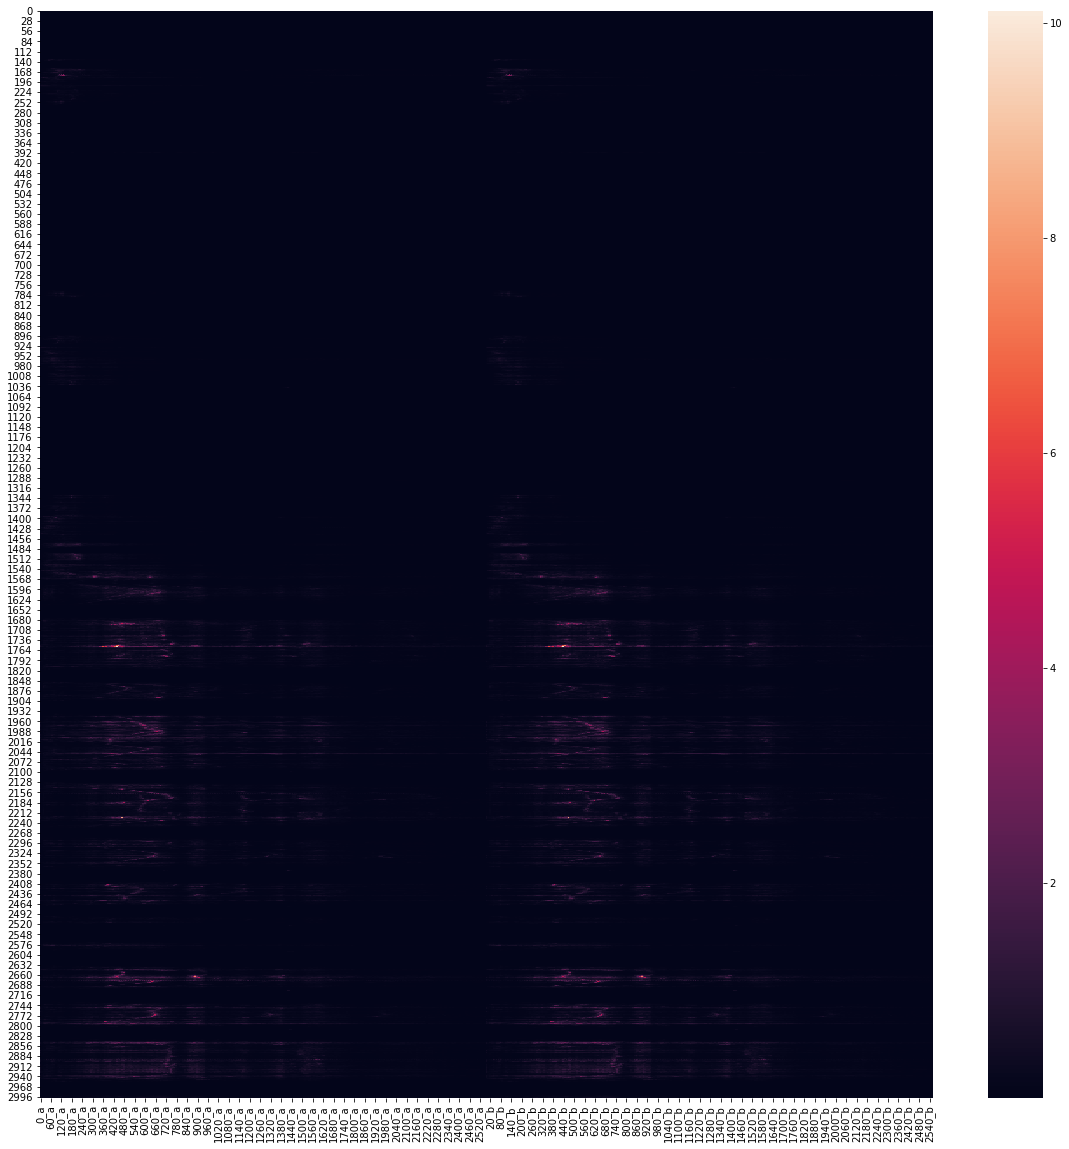

In [99]:
plt.figure(figsize=(20,20))
sb.heatmap(df)
plt.show()

In [63]:
df2 = np.log(df)

In [64]:
df2["cluster"] = (ten.labels_ *1.2) - 2
df2.head()



0_a      10_a      20_a      30_a      40_a      50_a      60_a  \
0 -4.675121 -5.508993 -5.924969 -6.342217 -6.547992 -6.621989 -6.909804   
1 -4.558515 -5.954450 -6.015987 -6.433740 -6.400945 -6.750701 -6.852366   
2 -4.400749 -6.110133 -6.347419 -6.467390 -6.827850 -6.805806 -6.876529   
3 -4.598627 -6.155862 -6.326891 -6.566853 -6.562134 -6.608527 -7.022356   
4 -4.292200 -5.910196 -6.357794 -6.233043 -6.645595 -5.992077 -6.090861   

       70_a      80_a      90_a  ...    2470_b    2480_b    2490_b    2500_b  \
0 -6.779909 -6.832581 -7.262316  ... -8.727891 -8.771557 -8.842847 -8.438669   
1 -6.872135 -7.406730 -6.952475  ... -8.659821 -8.671849 -8.532777 -8.543997   
2 -6.973495 -7.030149 -6.935787  ... -8.514430 -8.620796 -8.510398 -8.440587   
3 -6.769141 -7.169782 -7.220056  ... -8.844128 -8.430055 -8.695215 -8.405692   
4 -6.997519 -7.133647 -6.632708  ... -8.593505 -8.489584 -8.775621 -8.536640   

     2510_b    2520_b    2530_b    2540_b    2550_b  cluster  
0 -8.827195 -8.636617 -8.718394 -8.695207 -8.513479     -2.0  
1 -8.745435 -8.637762 -8.649802 -8.389345 -8.943561     -2.0  
2 -8.350155 -8.564305 -8.876479 -8.776386 -9.293635     -2.0  
3 -8.764824 -8.670898 -8.870559 -8.277612 -8.900824     -2.0  
4 -8.803250 -8.951614 -8.603564 -8.482036 -8.739134     -2.0  

[5 rows x 513 columns]

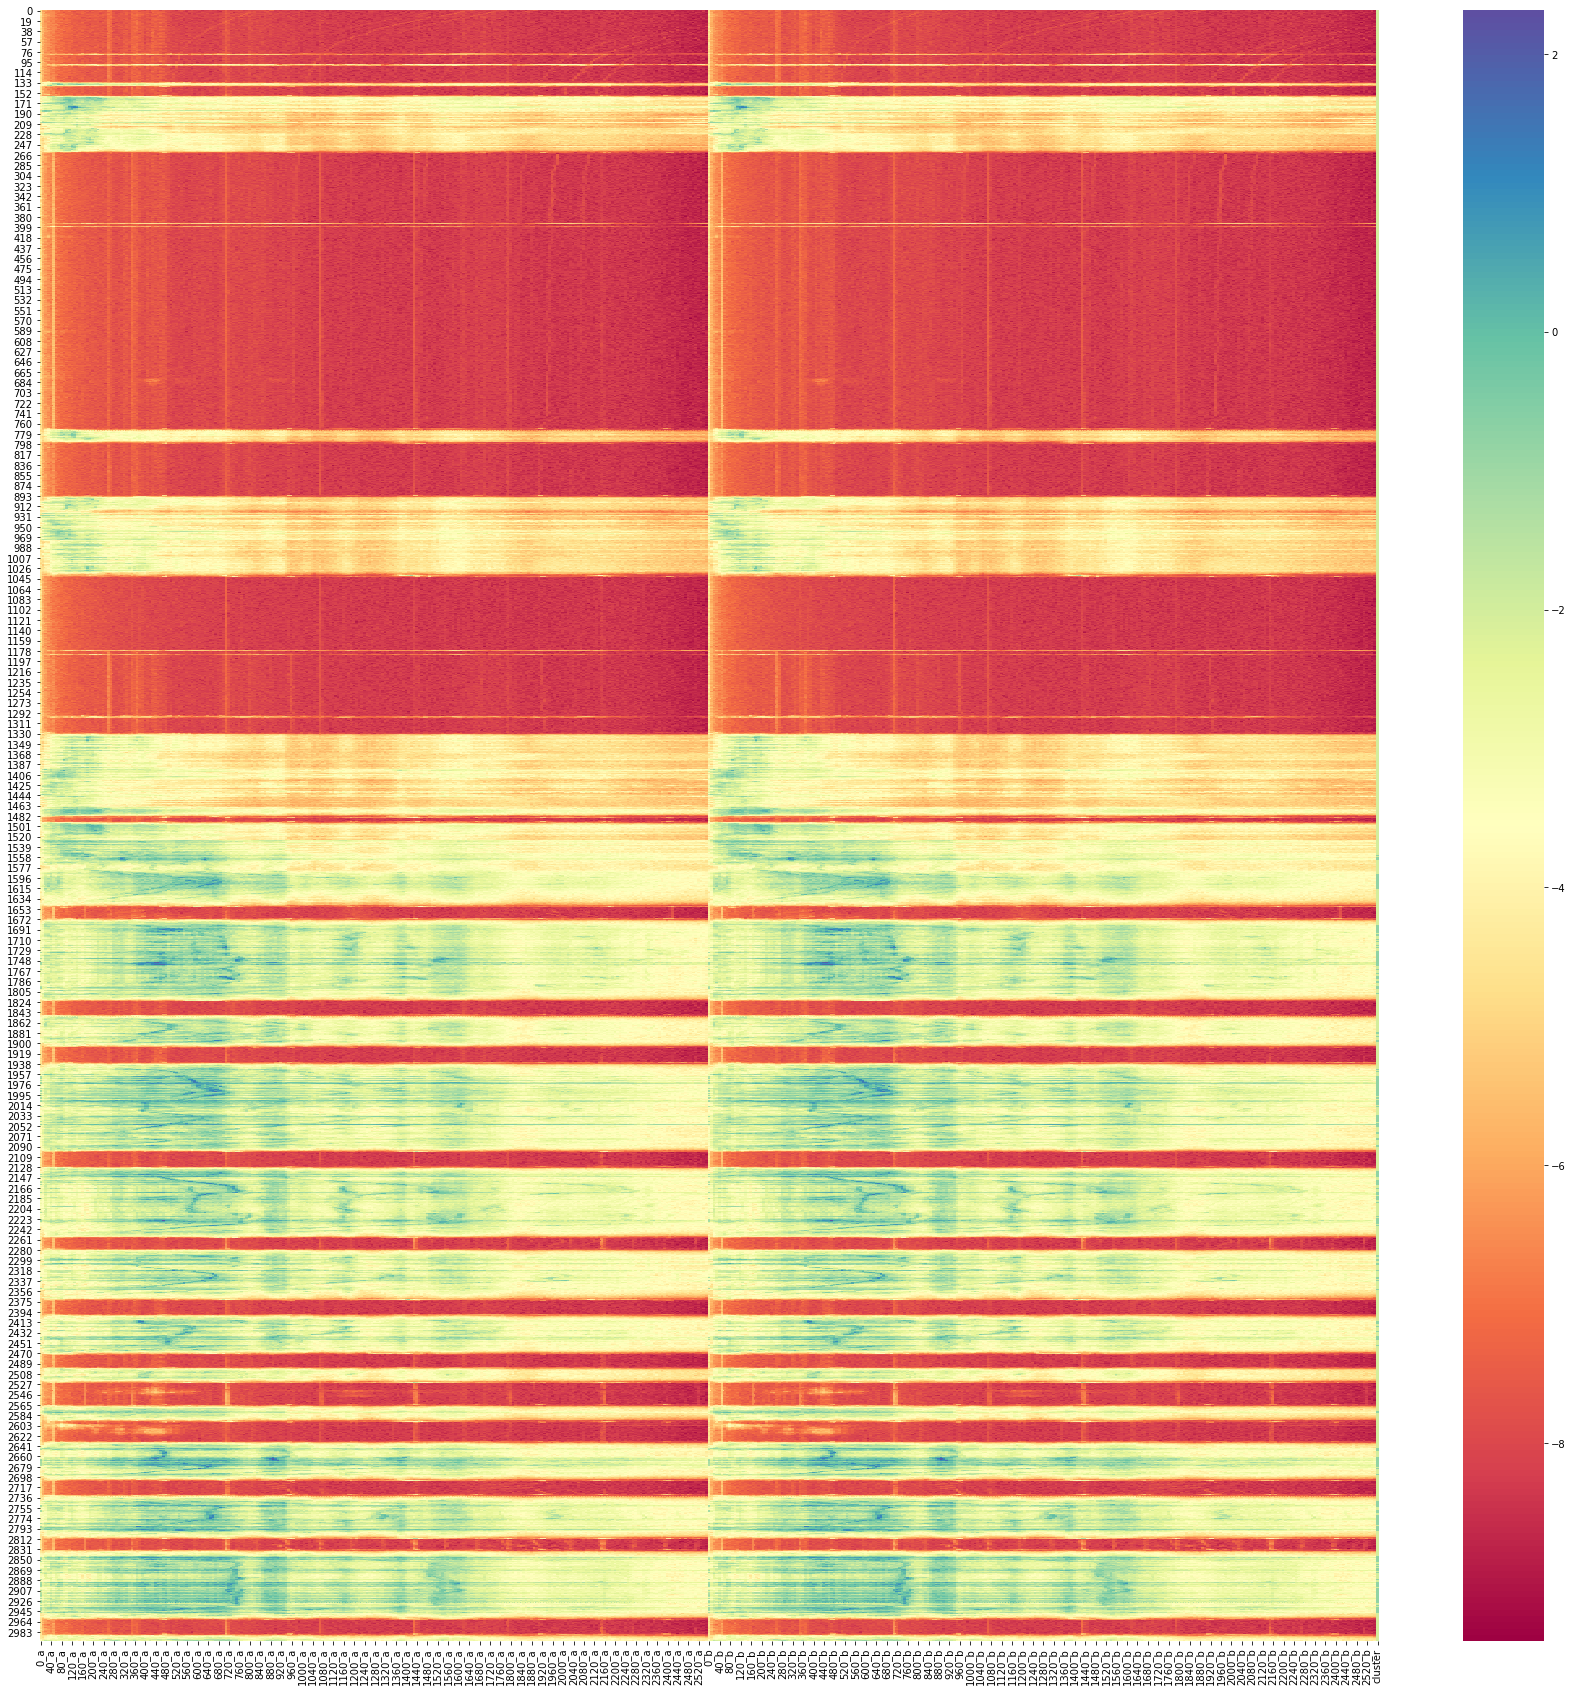

In [65]:
plt.figure(figsize=(30,30))
sb.heatmap(df2, cmap="Spectral")
plt.show()

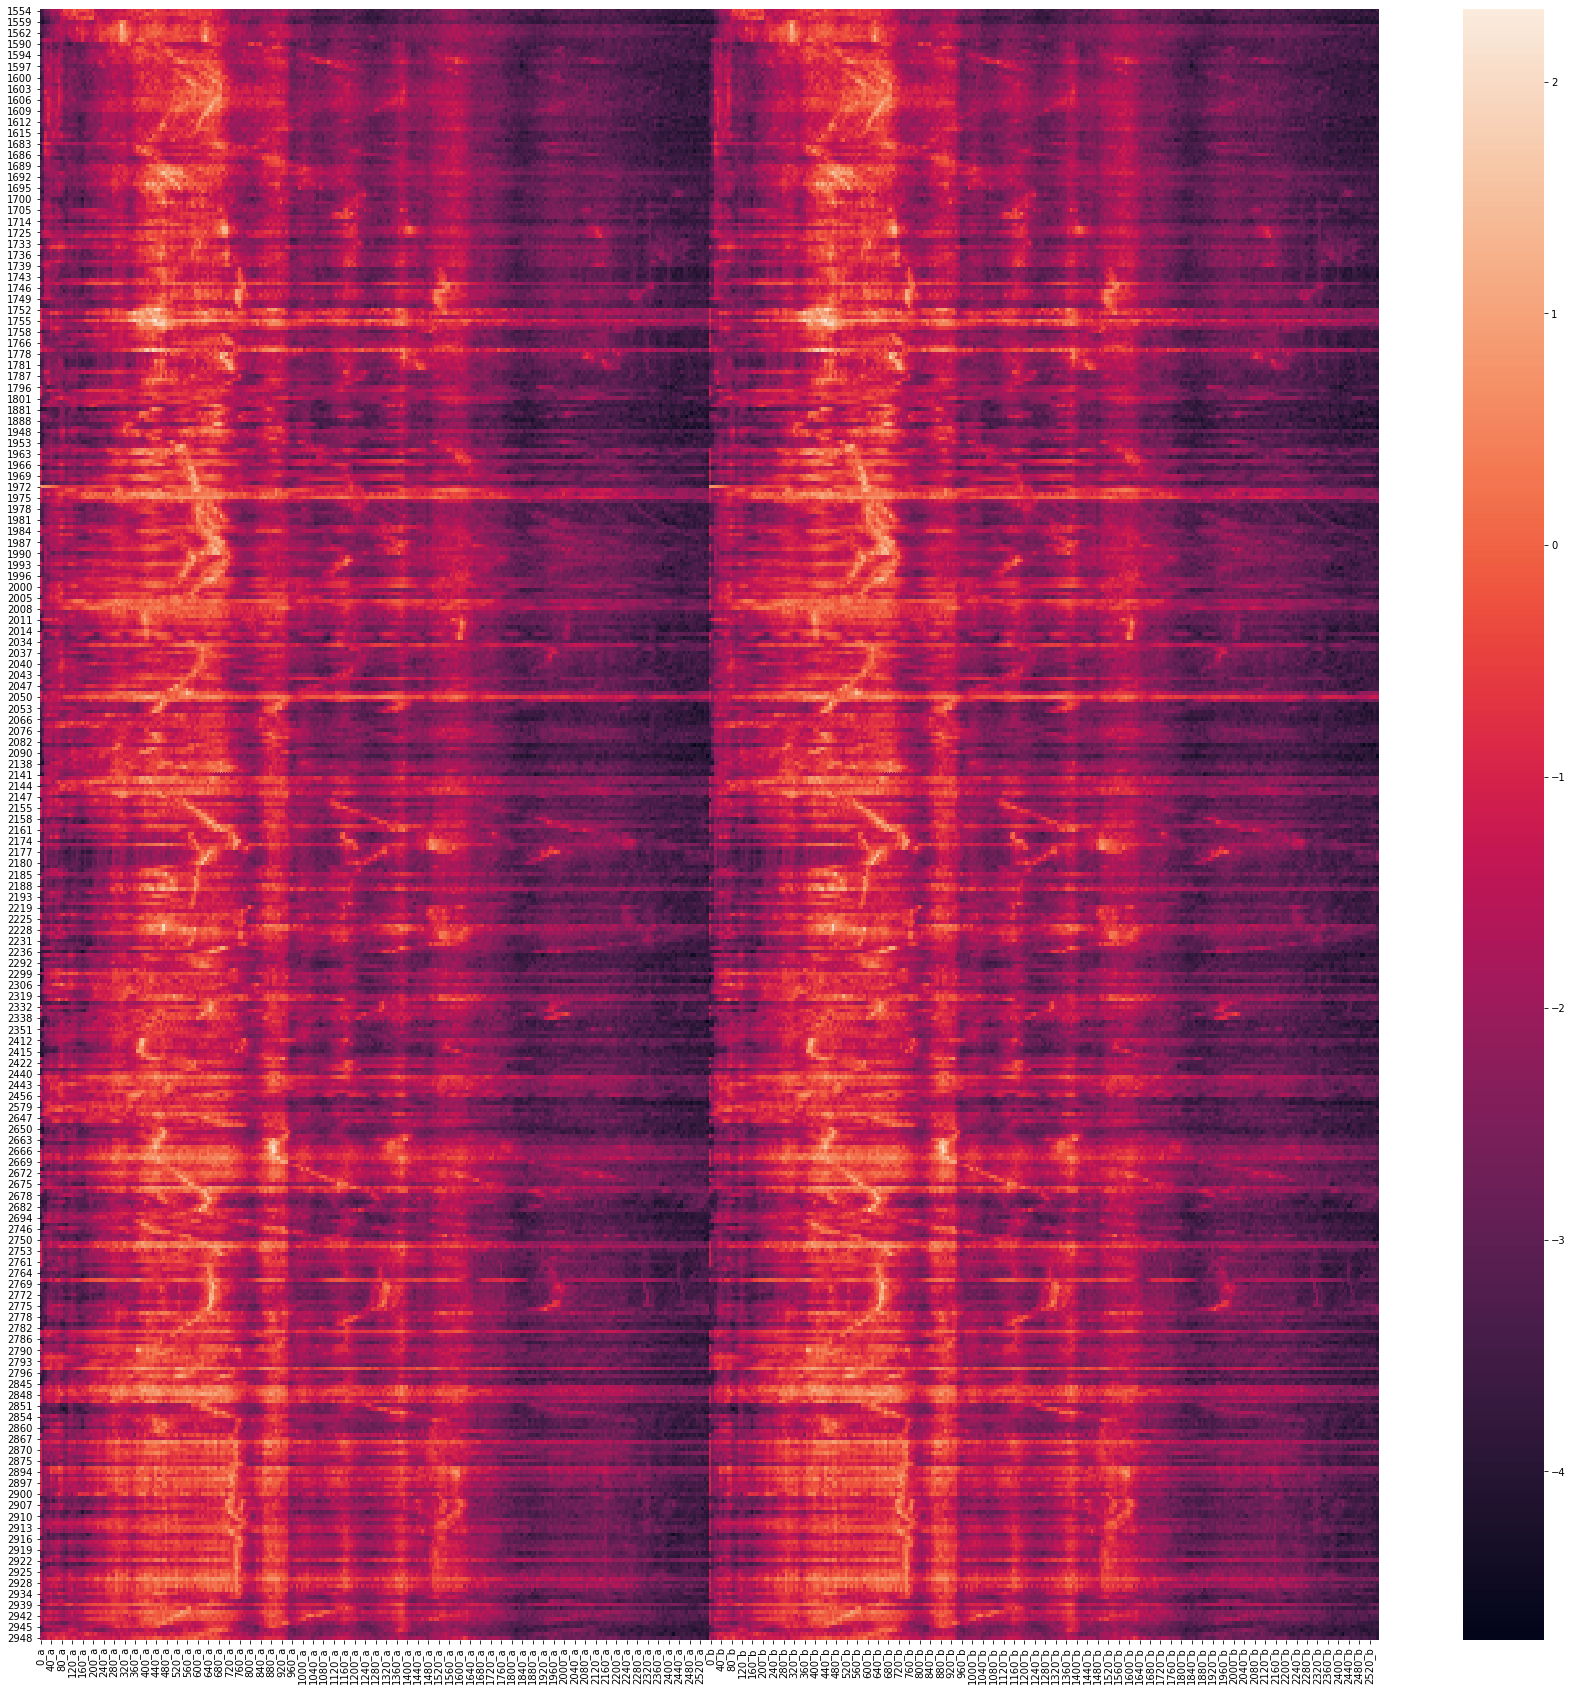

In [66]:
plt.figure(figsize=(30,30))
sb.heatmap(np.log(class_1))
plt.show()

In [60]:
class_1 = df.loc[ten.labels_ == 1,:]

In [61]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

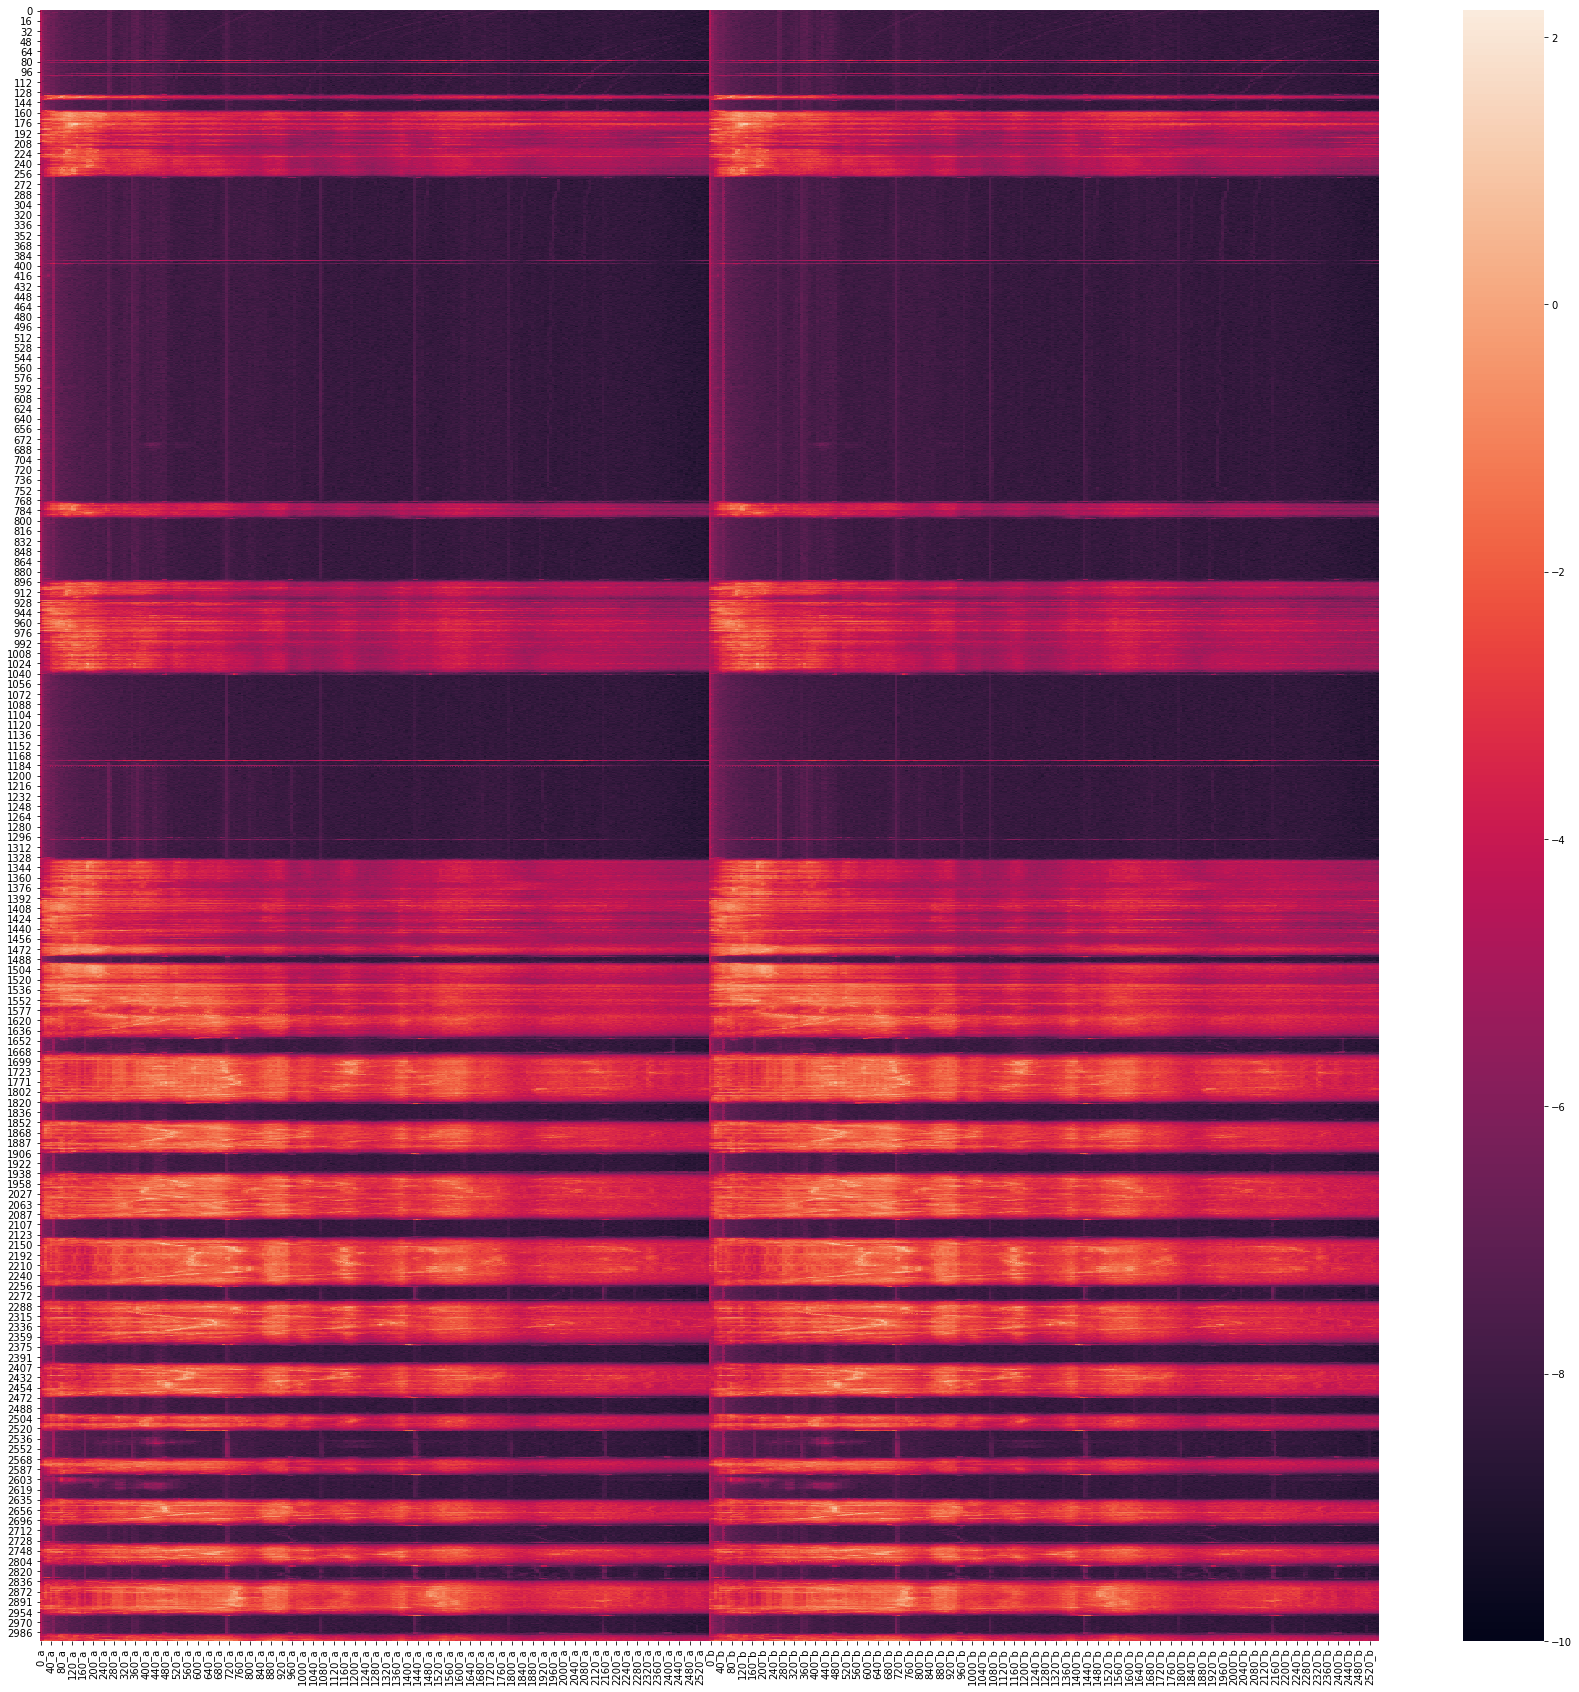

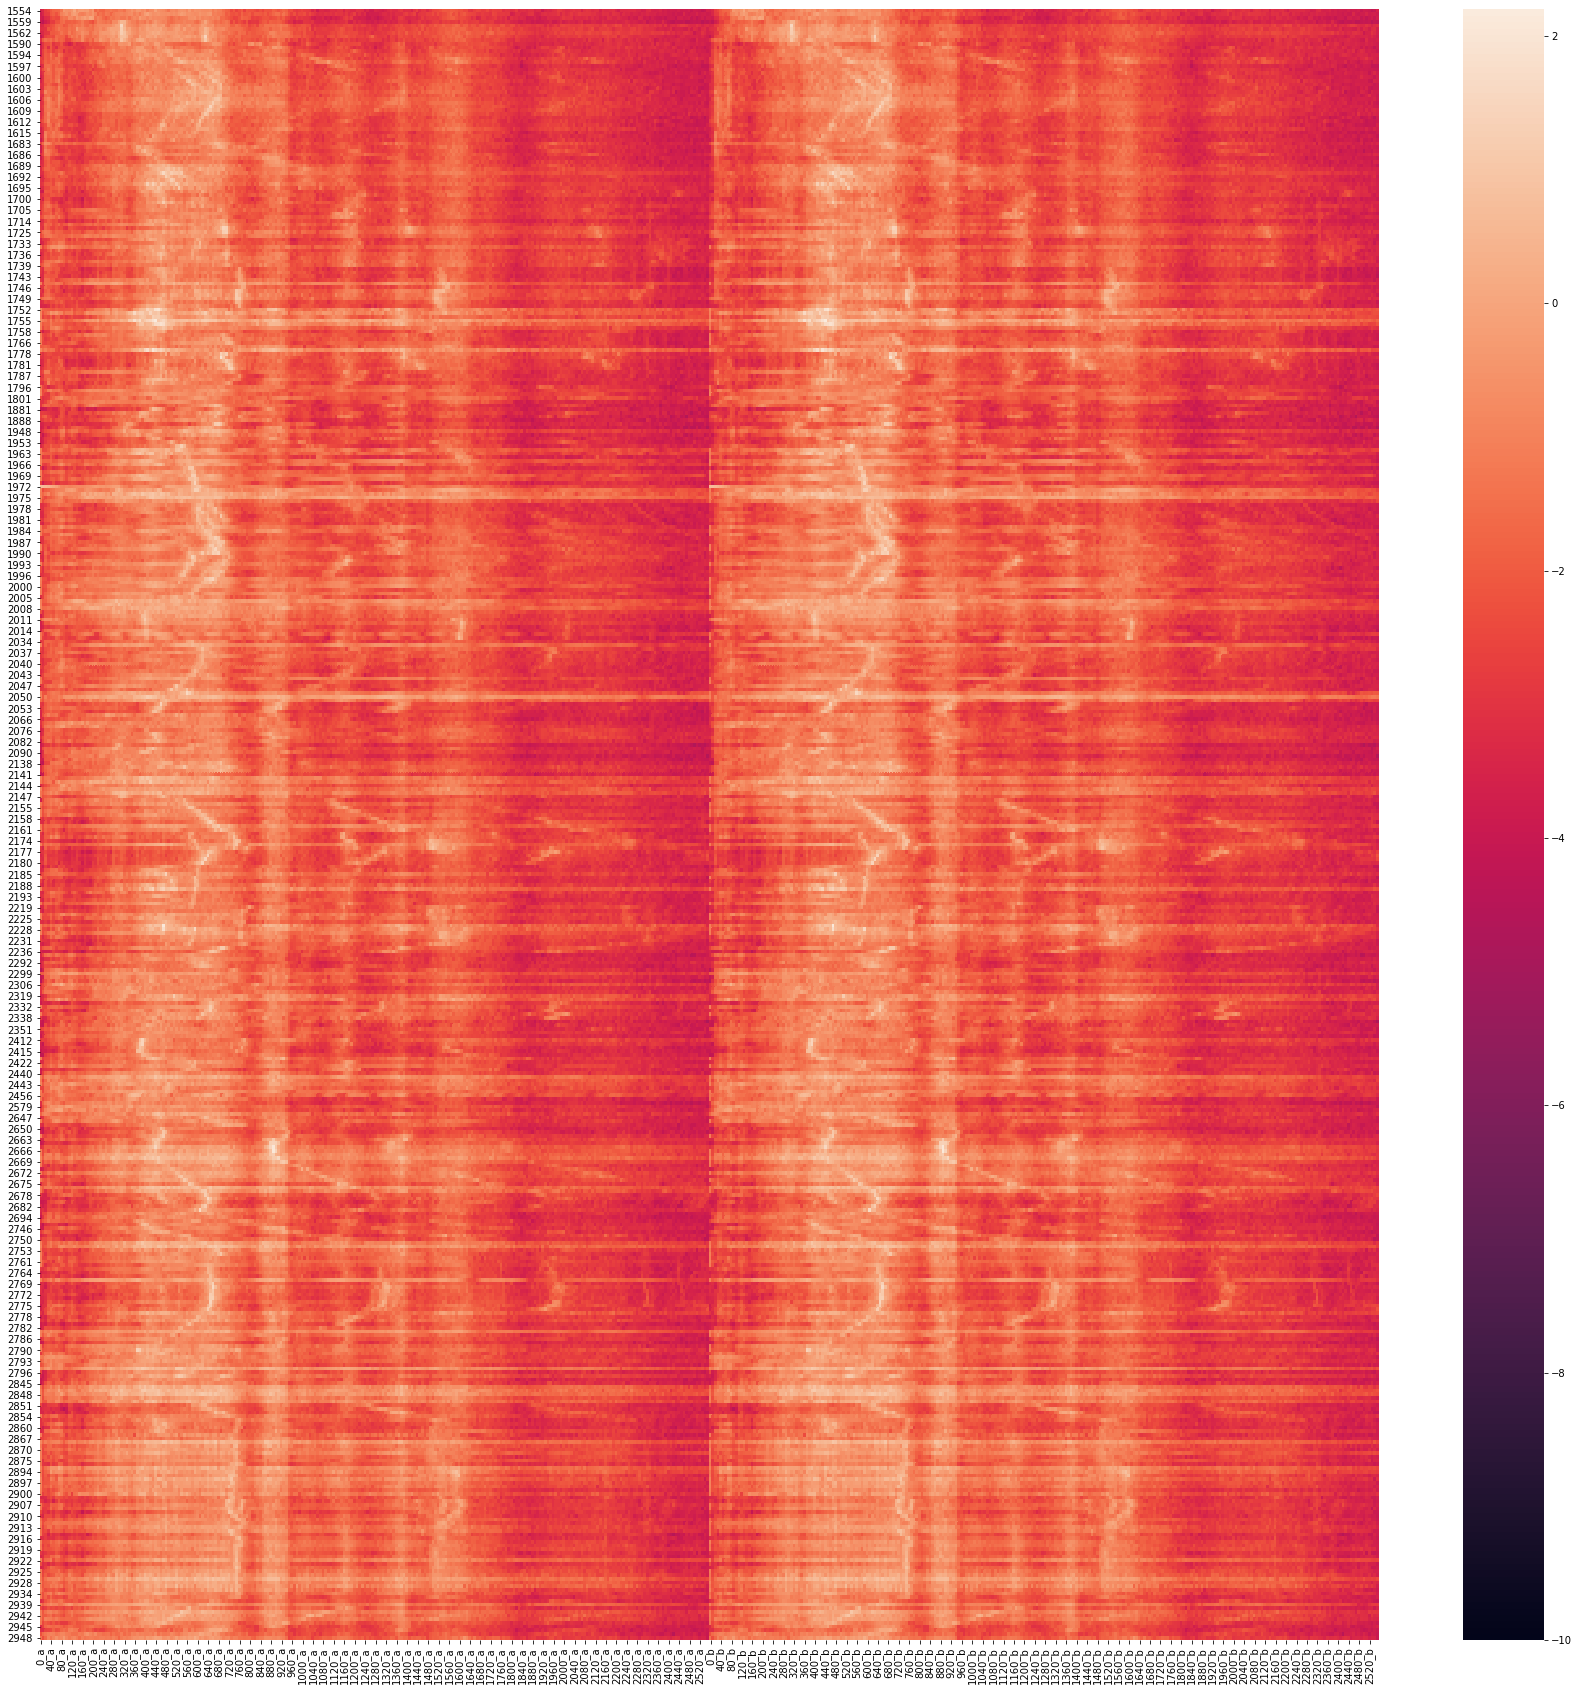

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


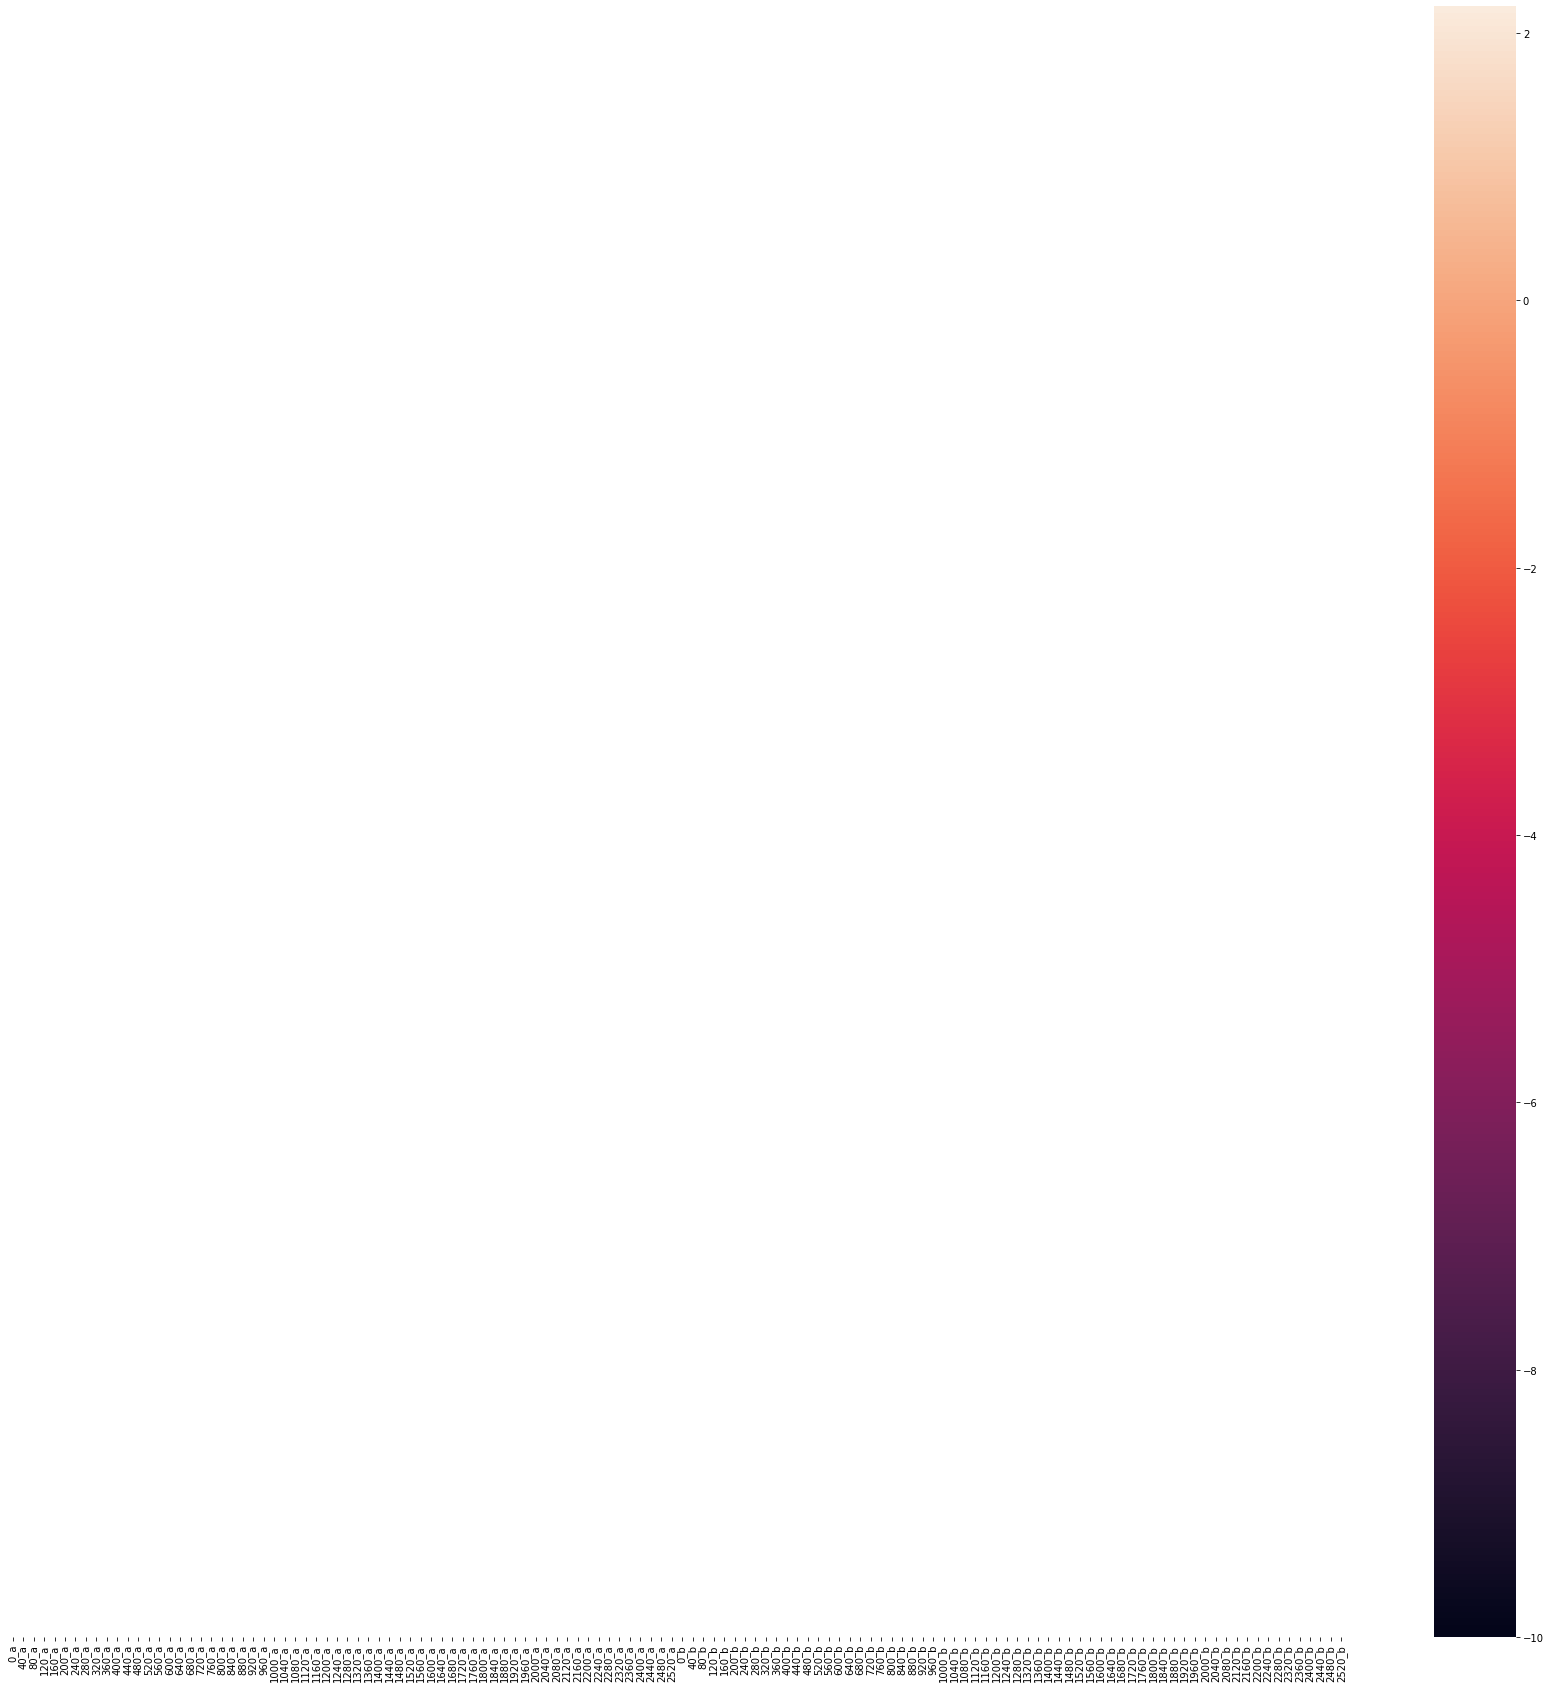

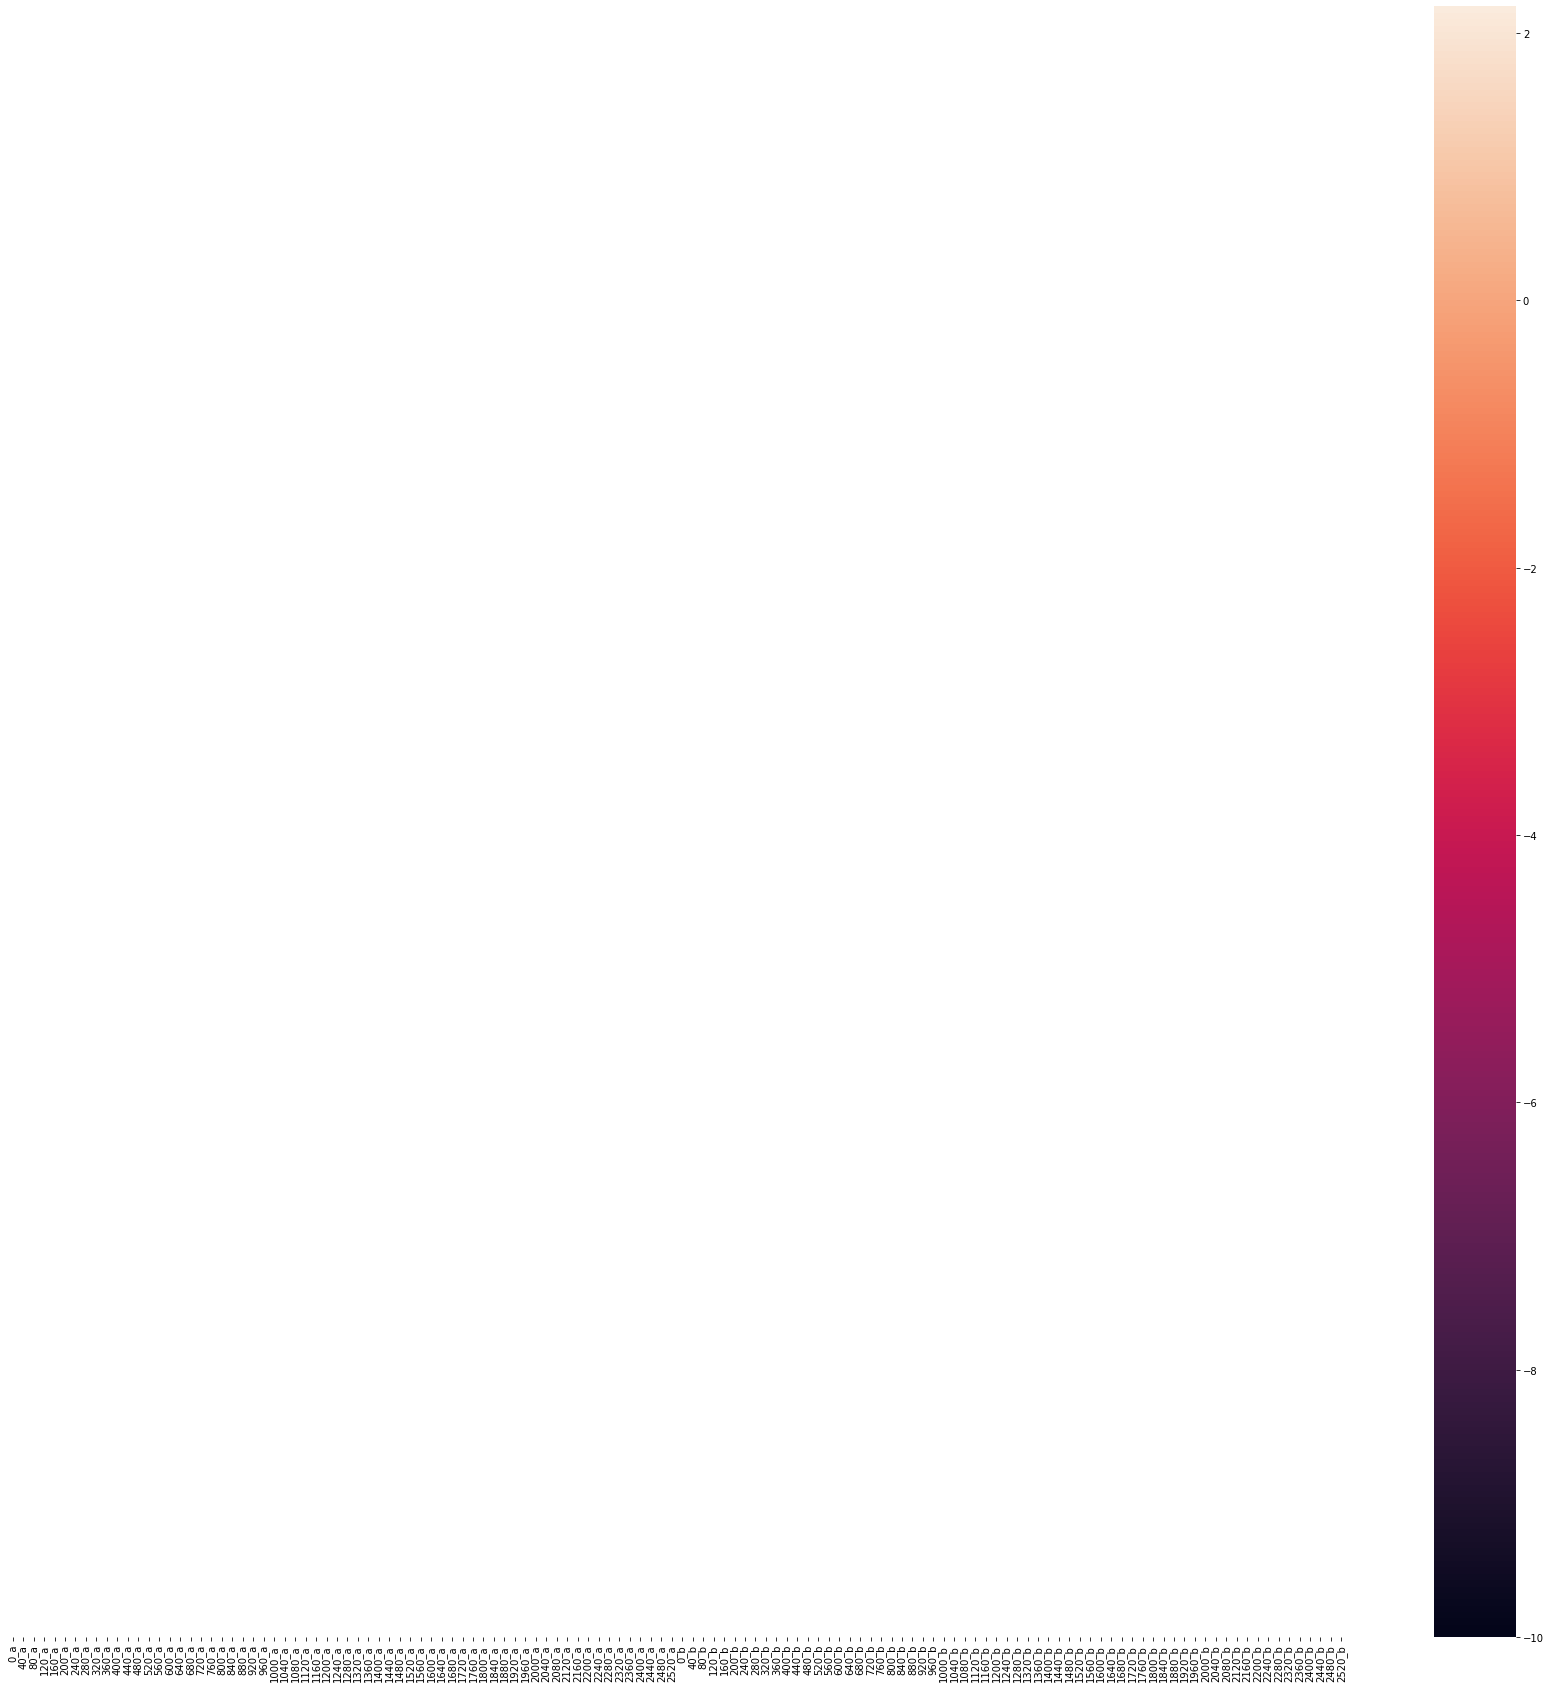

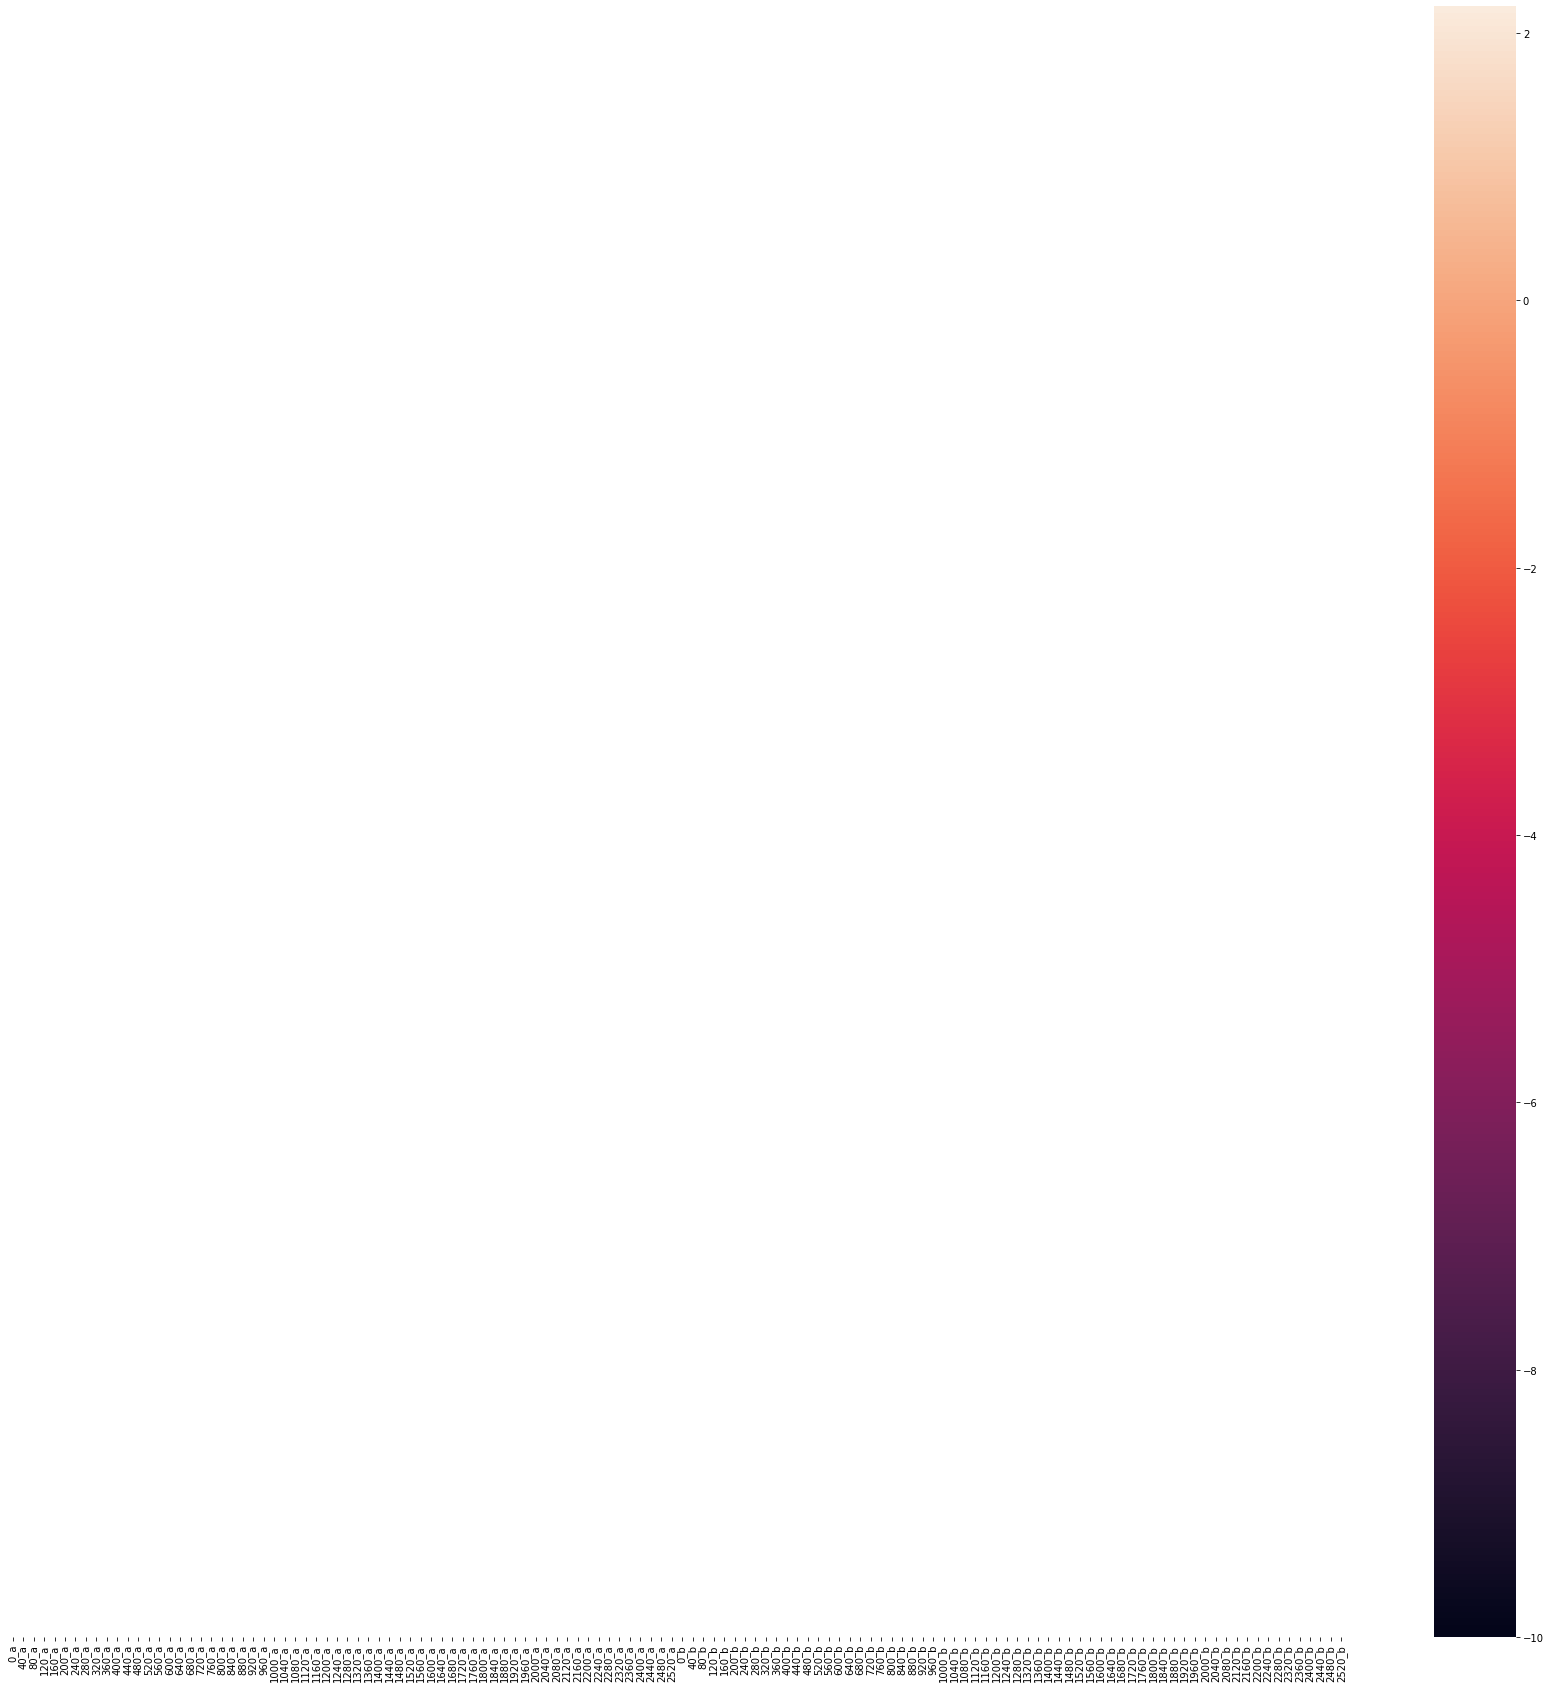

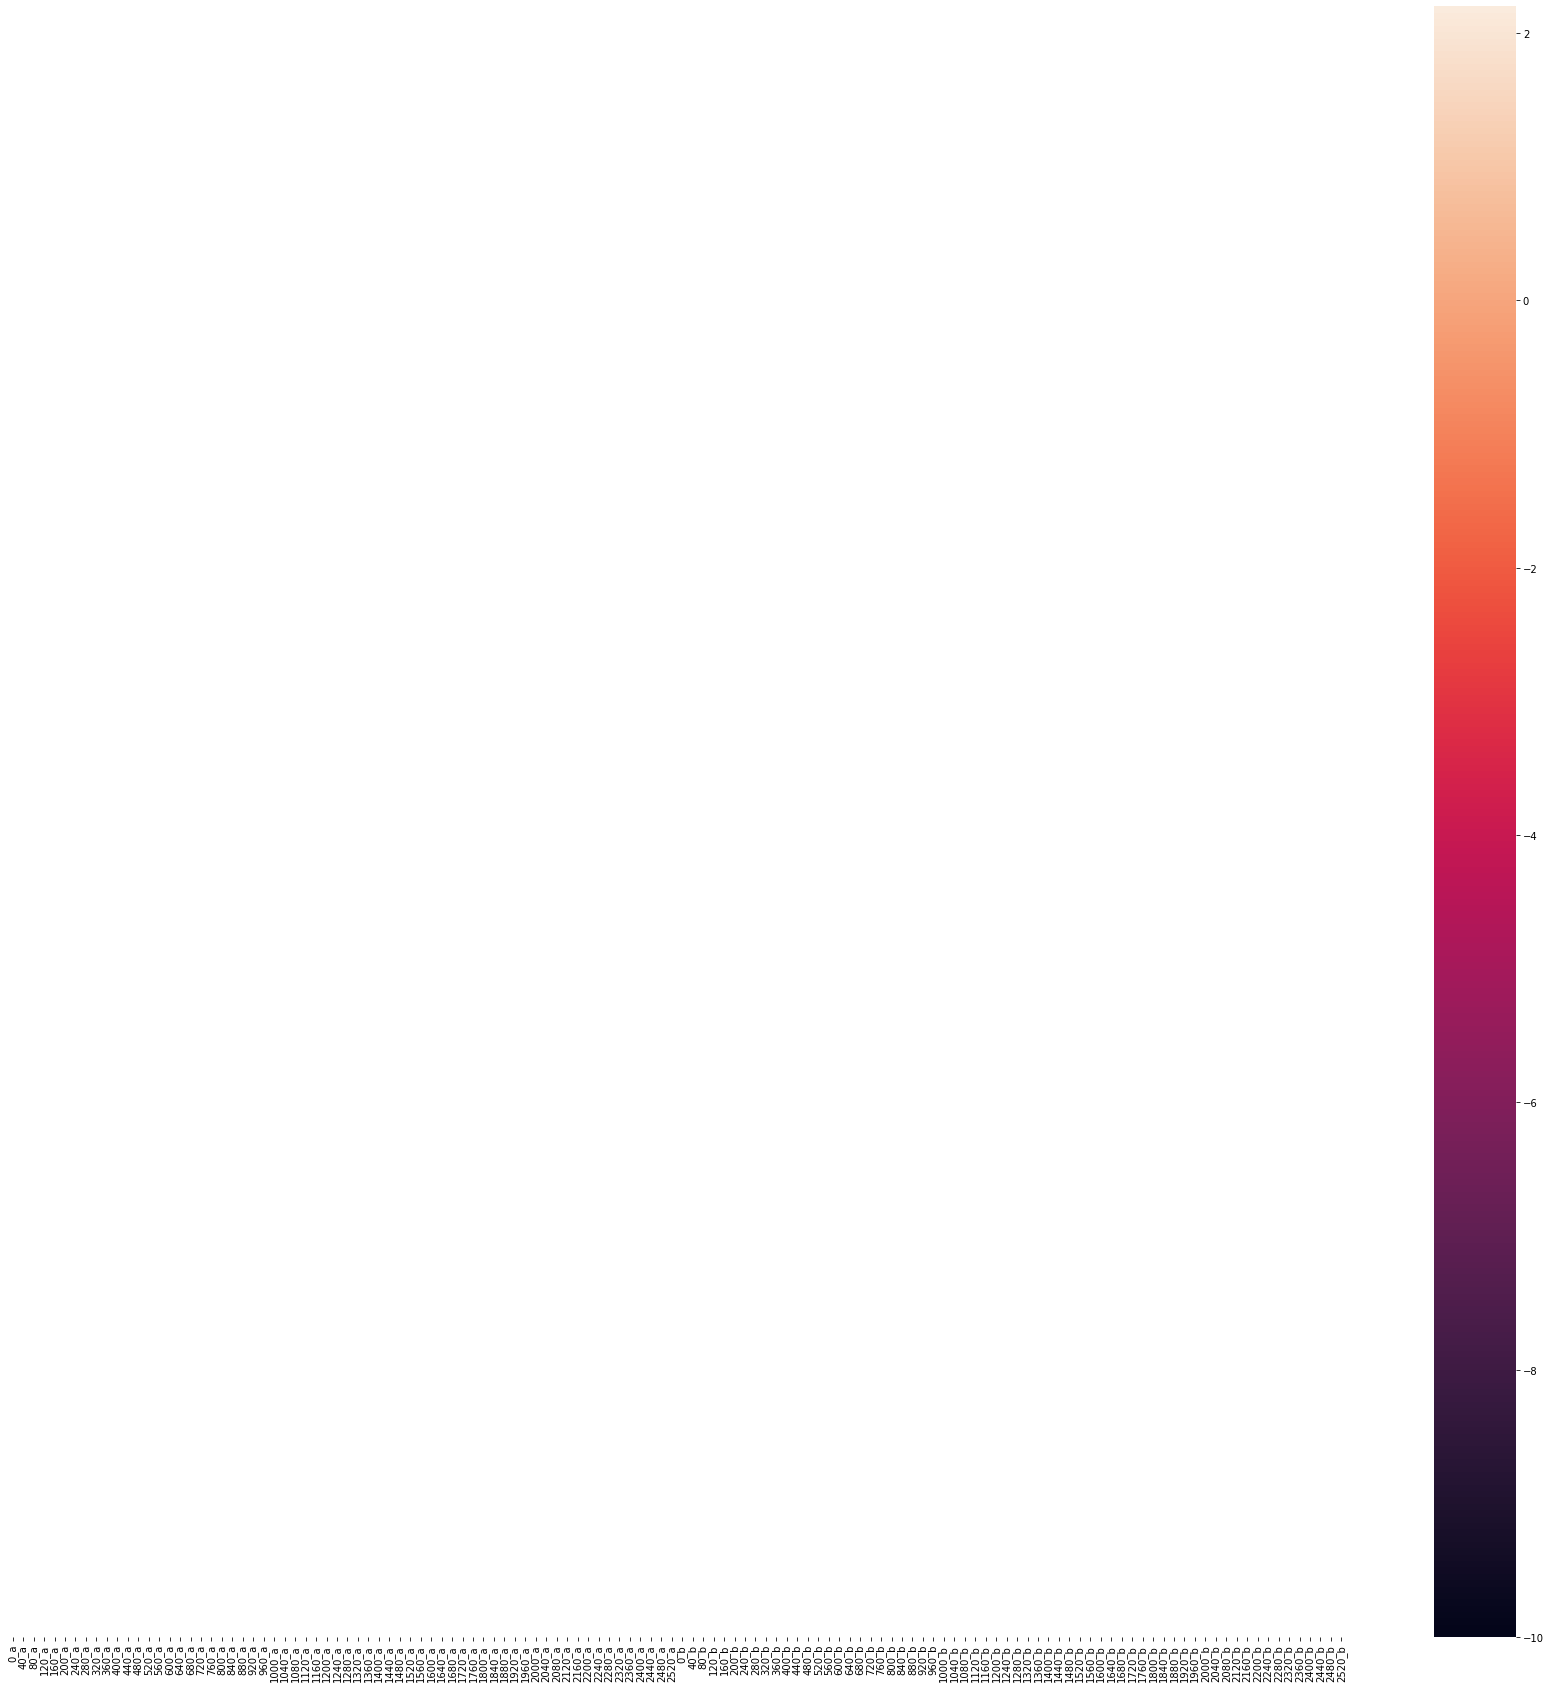

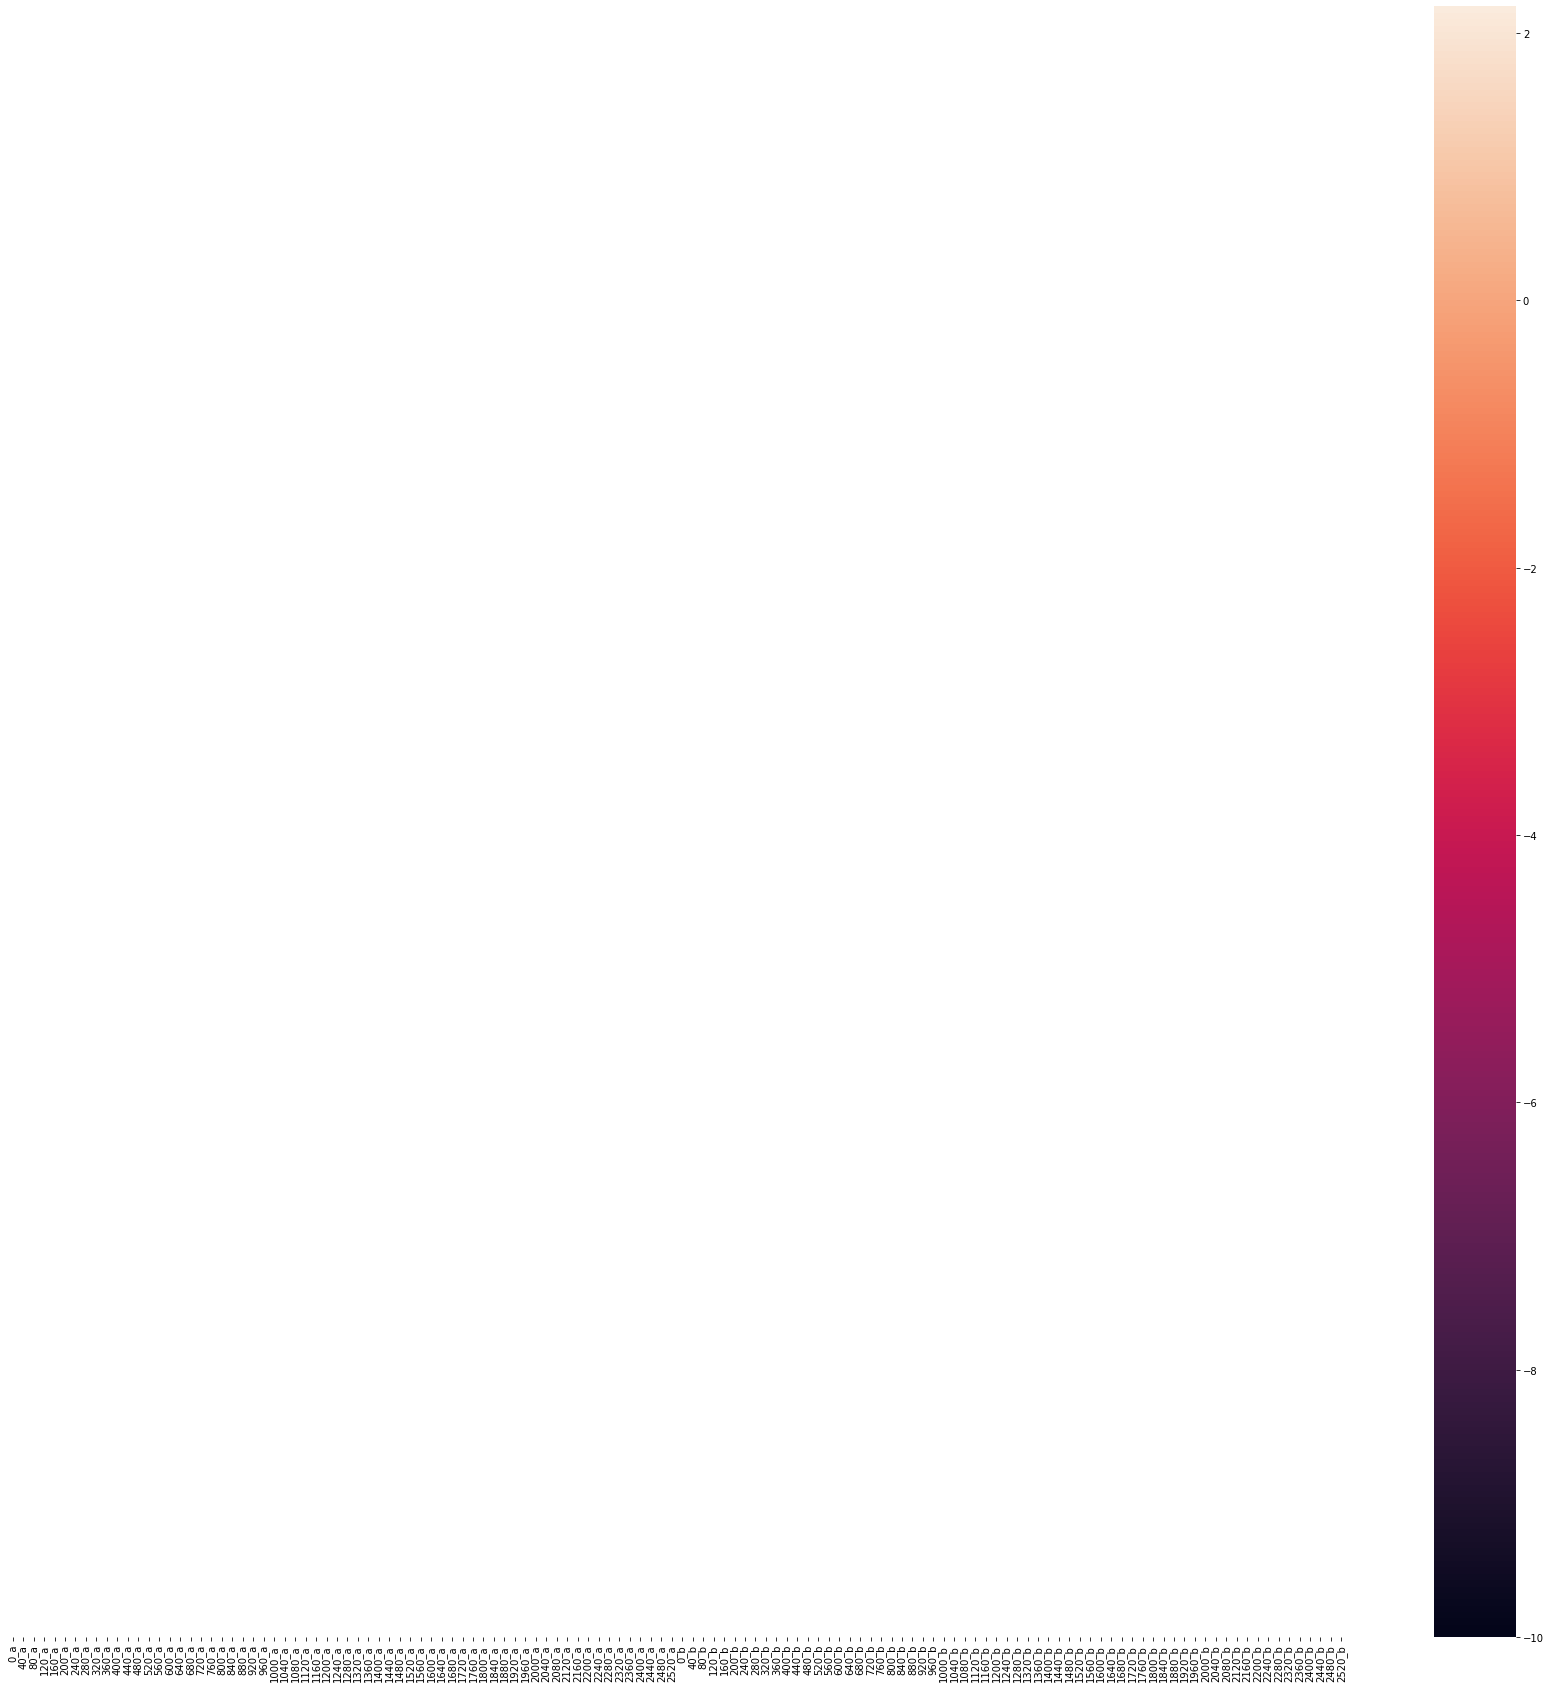

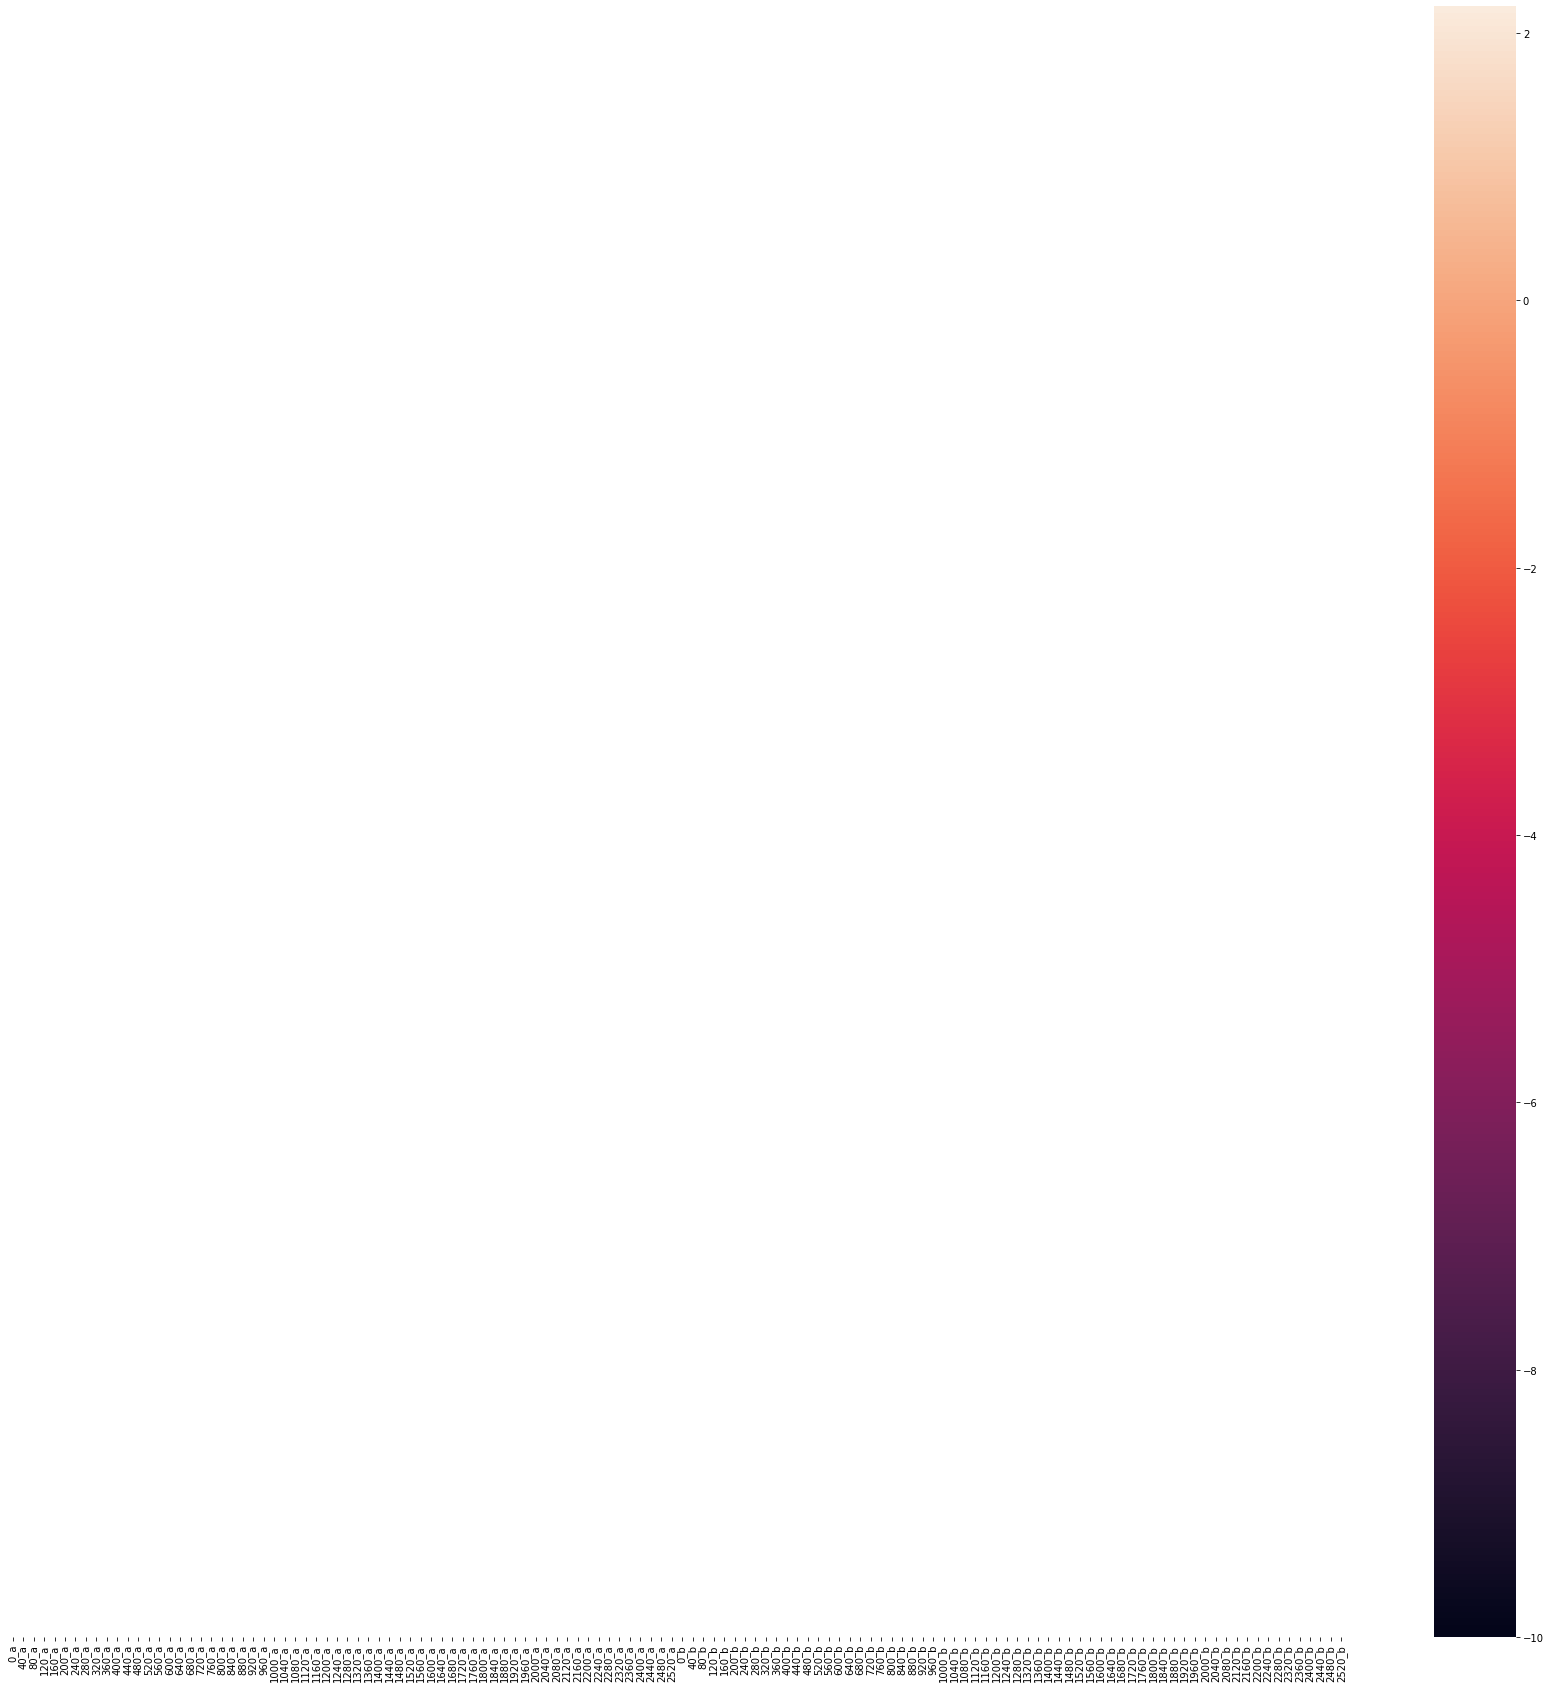

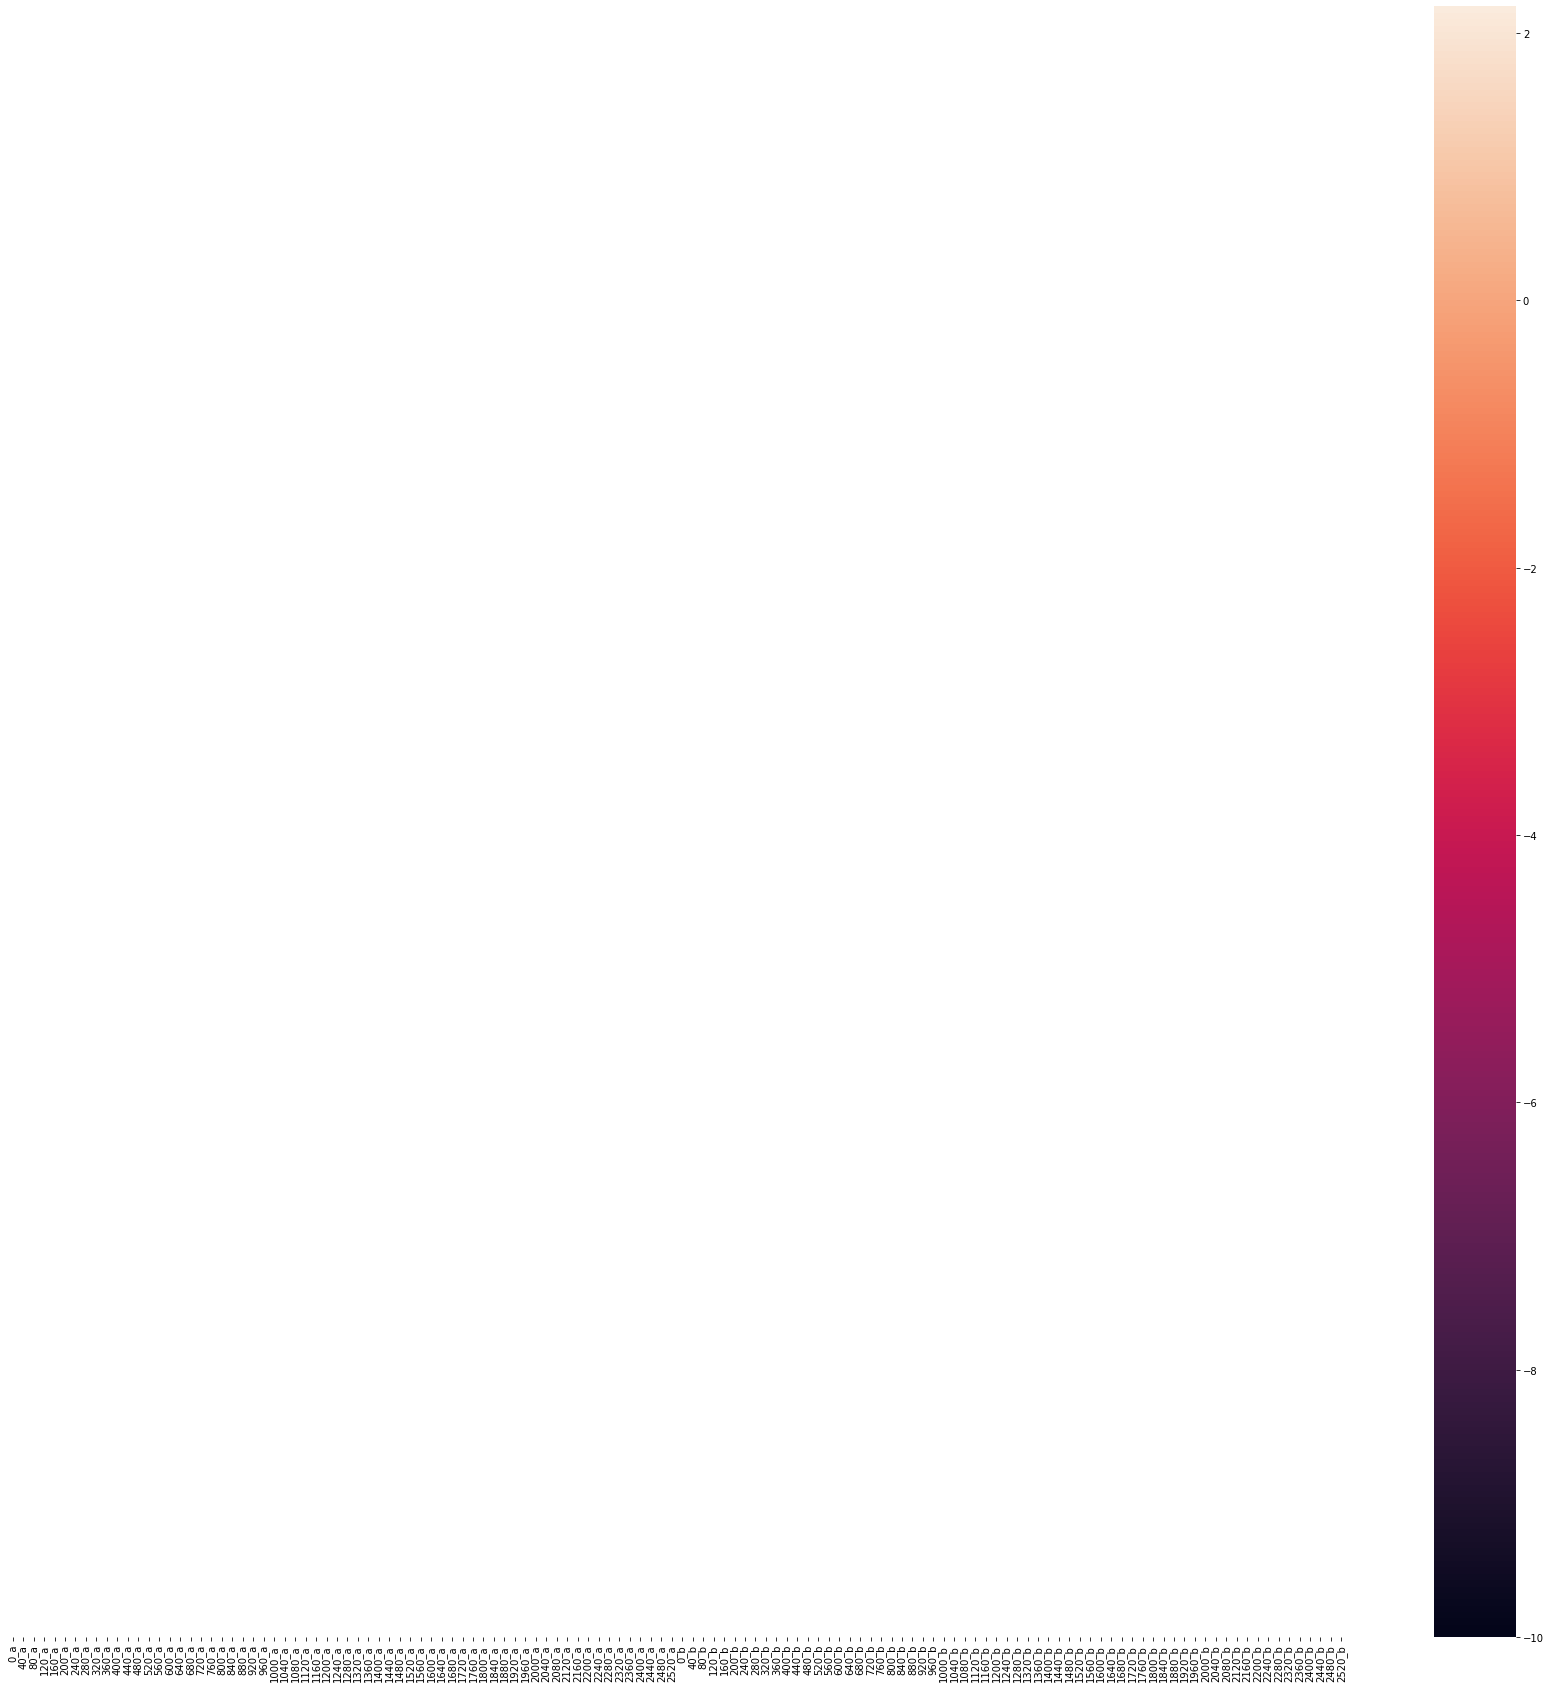

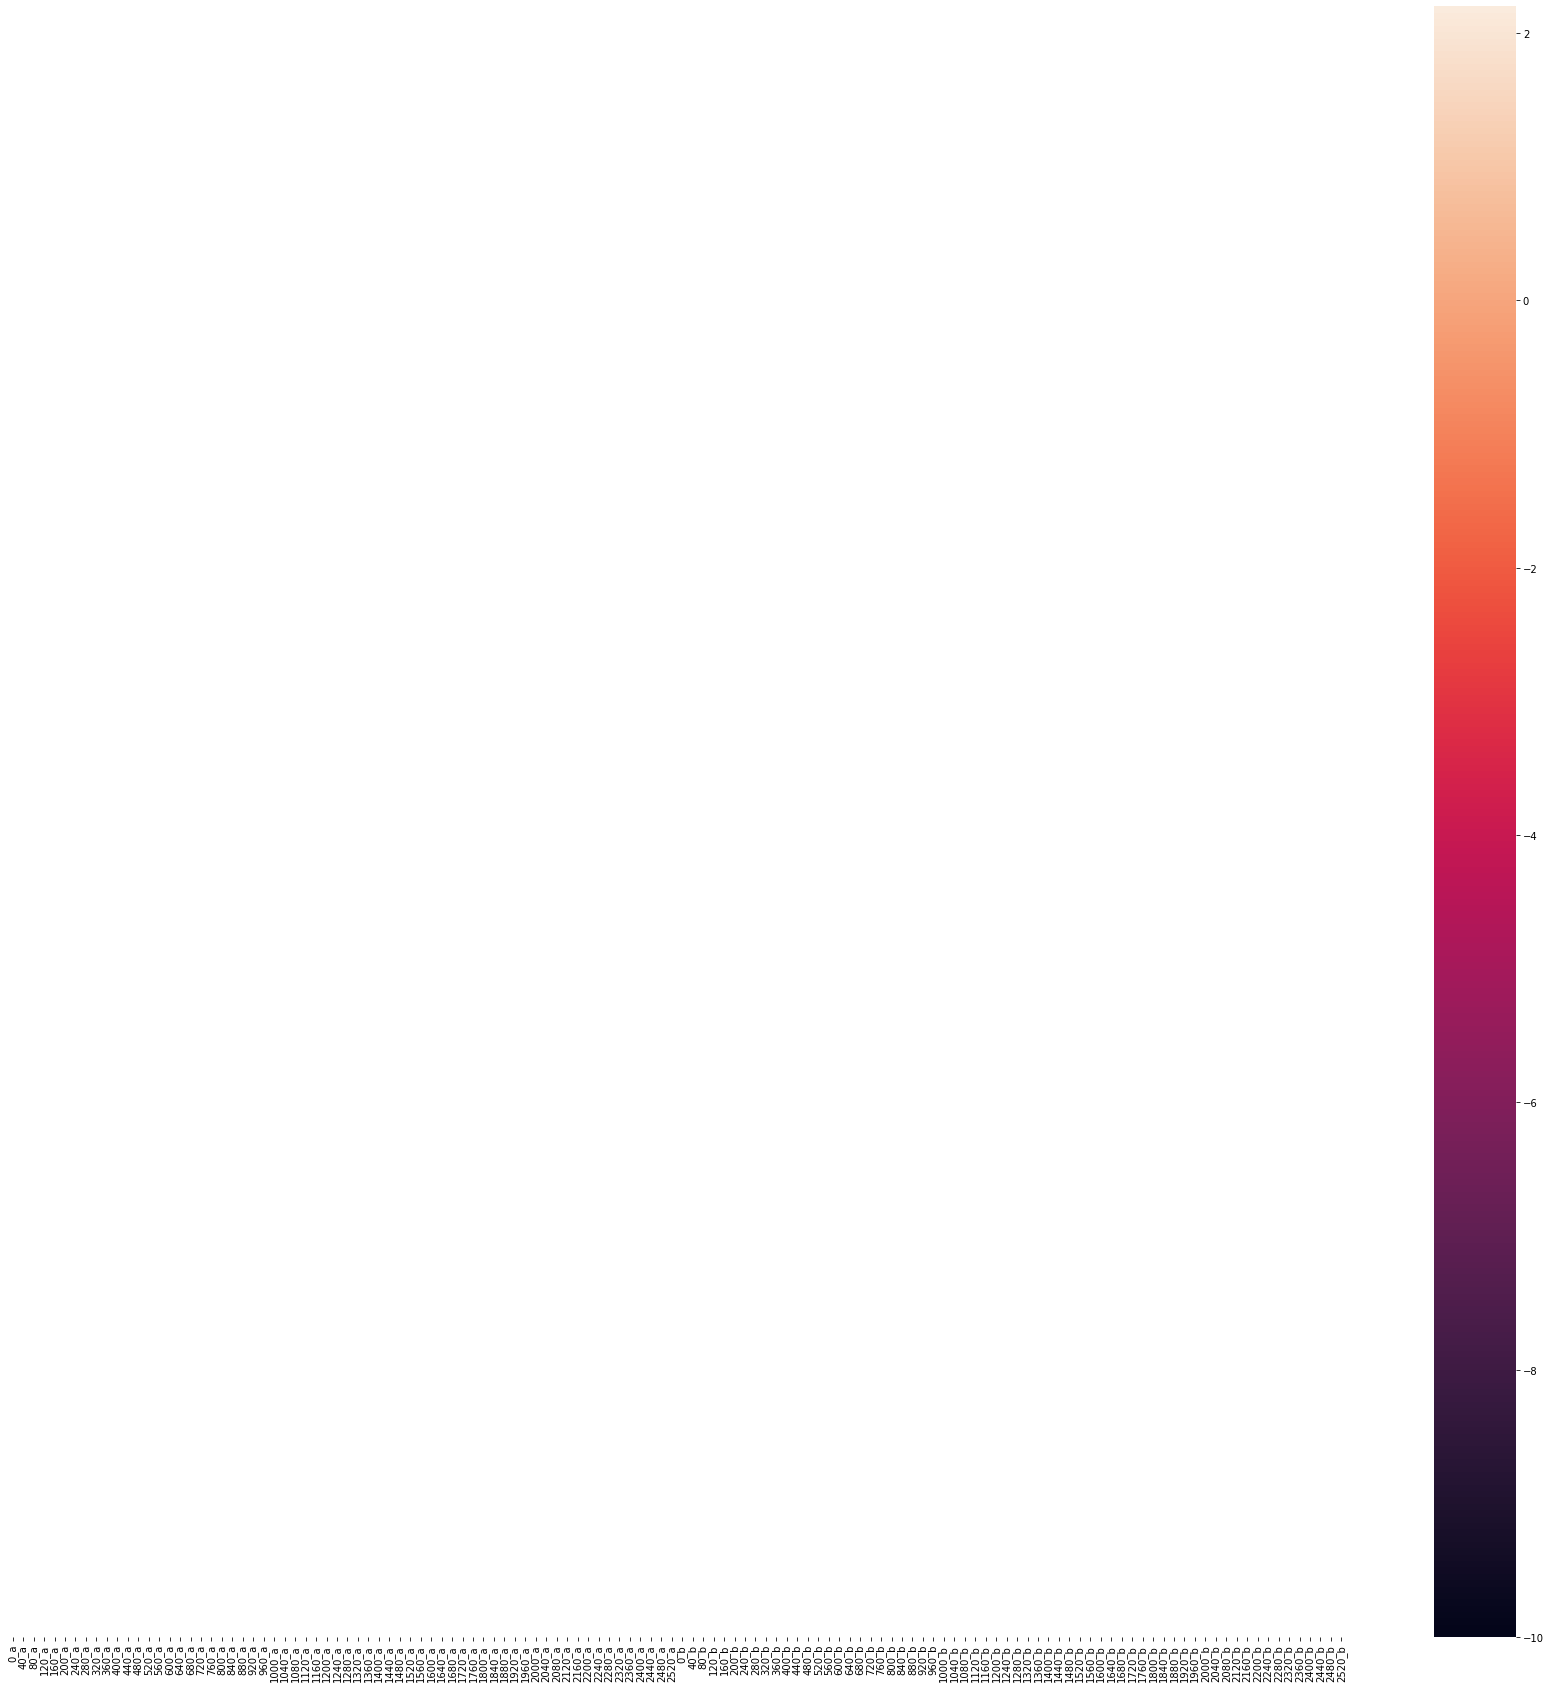

In [62]:
for i in np.arange(0,10):
    plt.figure(figsize=(30,30))
    sb.heatmap(np.log(df.loc[ten.labels_ == i,:]), vmin=-10, vmax=2.2)
    plt.show()
    
    

In [70]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps =0.3, min_samples=50).fit(np.log(df))


In [80]:
for i in np.arange(0.05, 6 , 0.3):
    db = DBSCAN(eps =i, min_samples=50).fit(np.log(df))
    if sum(db.labels_) > 0:
        print(i, sum(db.labels_))
        break

In [81]:
from sklearn.neighbors import NearestNeighbors as NN


In [83]:
nn_2 = NN(n_neighbors = 2, algorithm="auto").fit(np.log(df))

In [89]:
from sklearn.cluster import SpectralClustering

In [90]:
spec = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=42).fit(np.log(df))

In [91]:
spec.labels_.mean()

0.11066666666666666

In [100]:
df4=np.log(df)
df4["spec_labels"] = spec.labels_

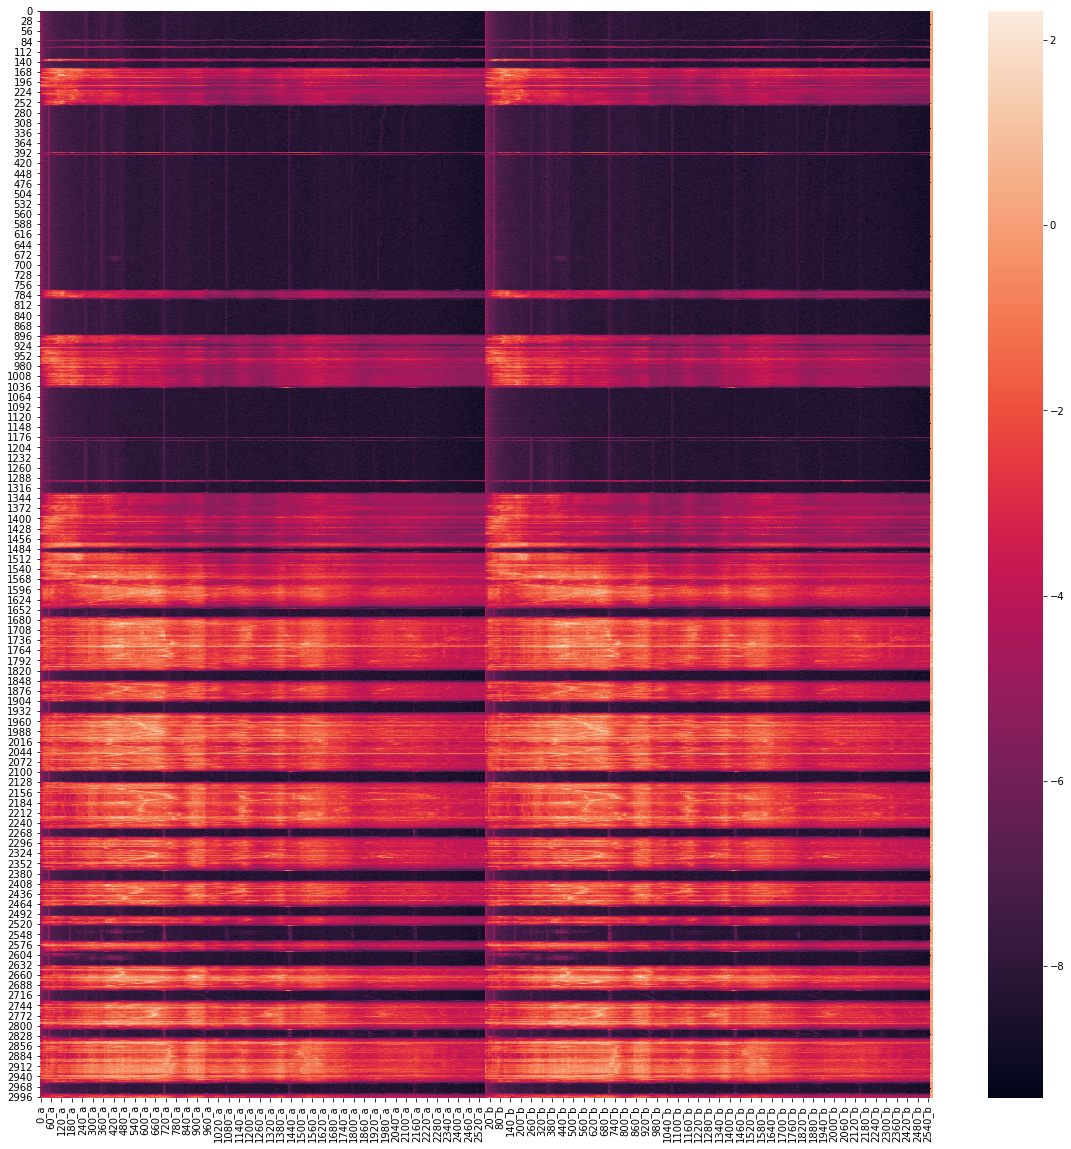

In [101]:
plt.figure(figsize=(20,20))
sb.heatmap(df4)
plt.show()

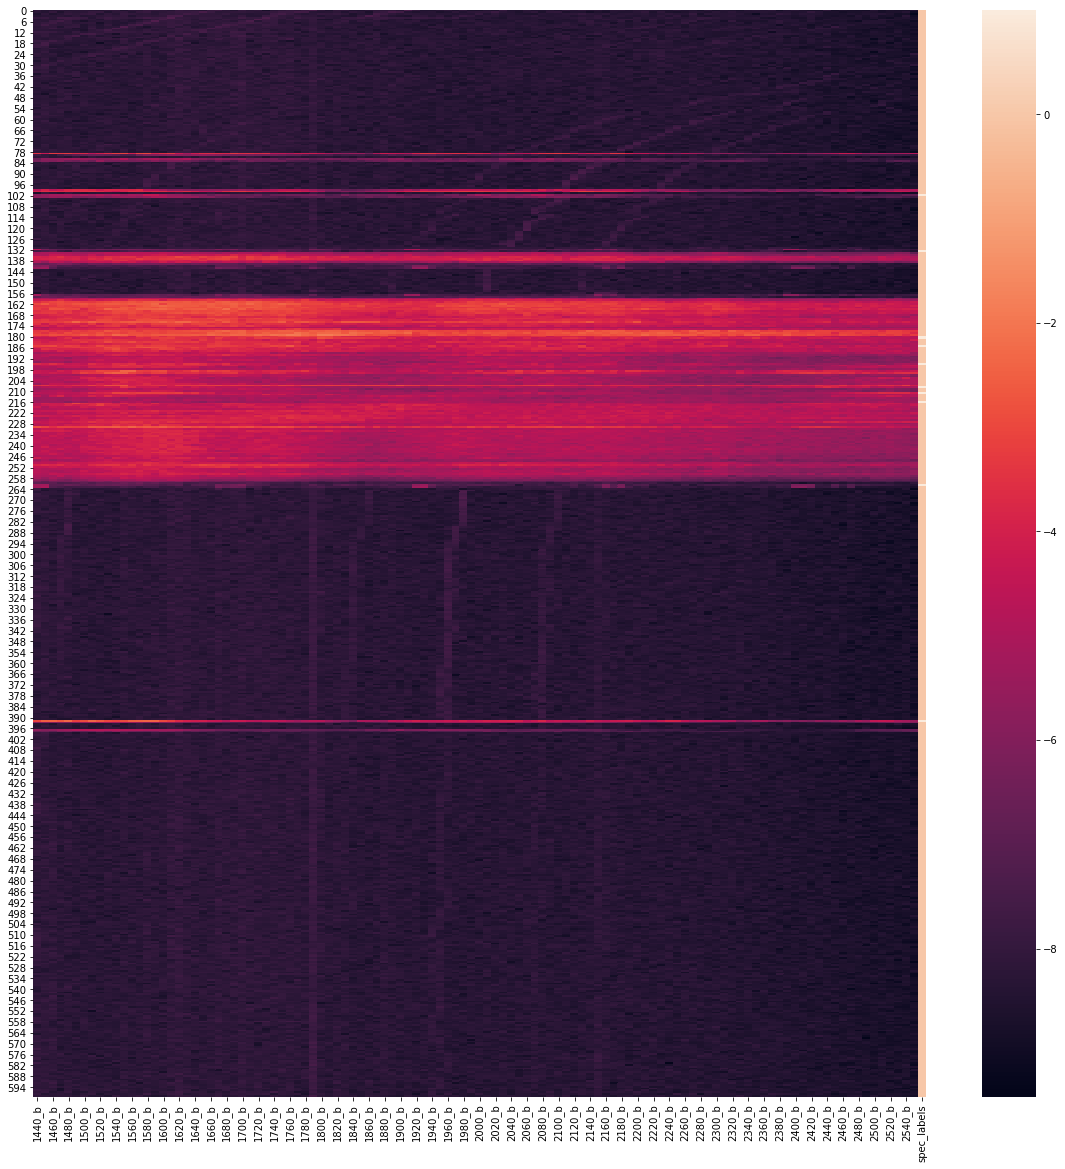

In [102]:
plt.figure(figsize=(20,20))
sb.heatmap(df4.iloc[0:600,400:])
plt.show()

In [103]:
df4.spec_labels.describe()

count    3000.000000
mean        0.110667
std         0.313771
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spec_labels, dtype: float64